In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split


In [25]:
# Read the CSV file
df = pd.read_csv('data1.csv')
tasklog = pd.read_csv('project_files/tasklog_time_adjusted.csv')
df["end_time"] = tasklog['TIME']
print (df)
#location column
loc = df.columns[0]  
#print(df)
duplicate_counts = df.groupby(loc).size().reset_index(name="count")
# Filter to only show locations with more than 2 occurrence
duplicates = duplicate_counts[duplicate_counts['count'] >= 5]
print(duplicates)

# Sort by count in descending order
duplicates = duplicates.sort_values('count', ascending=False)

print(duplicates)
target_locs = duplicates['location'].to_list()
# print(df_filtered)
# print(type(df_filtered))


     location                   end_time  reward
0          38  2012-04-03 18:00:09+00:00       6
1          13  2012-04-03 18:00:25+00:00       8
2          38  2012-04-03 18:02:24+00:00       5
3          44  2012-04-03 18:02:41+00:00       8
4          43  2012-04-03 18:03:00+00:00       8
..        ...                        ...     ...
694        58  2012-04-03 23:58:00+00:00       8
695        43  2012-04-03 23:58:23+00:00       8
696        43  2012-04-03 23:59:17+00:00       7
697        49  2012-04-03 23:59:18+00:00       5
698        53  2012-04-03 23:59:38+00:00       8

[699 rows x 3 columns]
    location  count
8         16      6
14        22      5
17        26      8
19        29     10
20        30      5
22        32     10
23        33      7
24        34     11
25        35     20
26        36     19
27        37     24
28        38     22
29        39     15
30        40     24
31        41     28
32        42     25
33        43     33
34        44     35
35      

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:22 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:15:07  7.090205    5.102134    8.997188
1  2012-04-03 18:15:33  7.090099    5.245199    9.030346
2  2012-04-03 18:24:02  7.088024    5.182857    8.804672
3  2012-04-03 18:36:56  7.084870    4.969539    8.974405
4  2012-04-03 18:37:12  7.084804    5.136259    9.002456
5  2012-04-03 18:46:30  7.082530    5.147608    8.997413
6  2012-04-03 18:56:09  7.080171    5.032769    8.844734
7  2012-04-03 19:20:53  7.074123    5.184566    9.012551
8  2012-04-03 19:21:10  7.074053    5.036269    9.001352
9  2012-04-03 19:36:57  7.070194    5.189958    8.965687
10 2012-04-03 19:51:07  7.066730    5.179640    8.914283
11 2012-04-03 19:51:41  7.066591    5.152734    8.954919
12 2012-04-03 20:26:09  7.058163    5.200121    8.910889
13 2012-04-03 20:34:20  7.056162    5.207806    9.020008
14 2012-04-03 20:51:27  7.051977    4.952458    8.842514
15 2012-04-03 20:56:27  7.050754    5.046885    8.918336
16 2012-04-03 20:58:08  7.05034

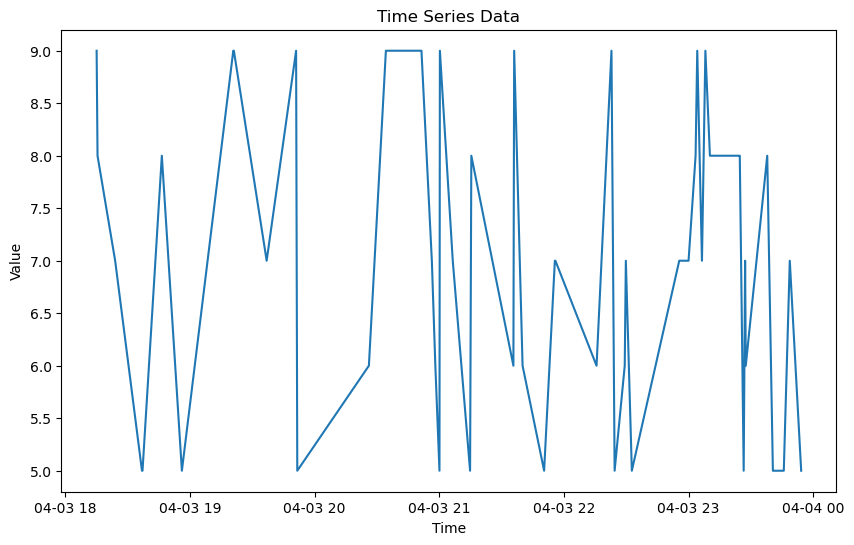

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:23 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:03:47  7.239968    5.273170    9.176598
1  2012-04-03 19:16:47  7.215781    5.272024    9.176636
2  2012-04-03 19:30:41  7.189920    5.187968    9.181846
3  2012-04-03 19:33:21  7.184958    5.289518    9.262668
4  2012-04-03 20:05:46  7.124647    5.080173    9.129768
5  2012-04-03 20:21:12  7.095933    5.037271    9.006051
6  2012-04-03 20:58:10  7.027155    5.109235    9.140643
7  2012-04-03 20:58:20  7.026845    5.116635    9.148425
8  2012-04-03 21:09:19  7.006411    5.142128    8.903211
9  2012-04-03 21:15:12  6.995465    4.843719    9.022378
10 2012-04-03 21:24:41  6.977821    4.931460    8.975720
11 2012-04-03 21:28:54  6.969975    4.900819    9.053477
12 2012-04-03 21:38:14  6.952611    4.879829    8.899127
13 2012-04-03 21:40:08  6.949076    4.983756    9.105569
14 2012-04-03 21:42:47  6.944145    4.801559    8.807022
15 2012-04-03 21:44:29  6.940982    4.852441    8.852965
16 2012-04-03 21:55:10  6.92110

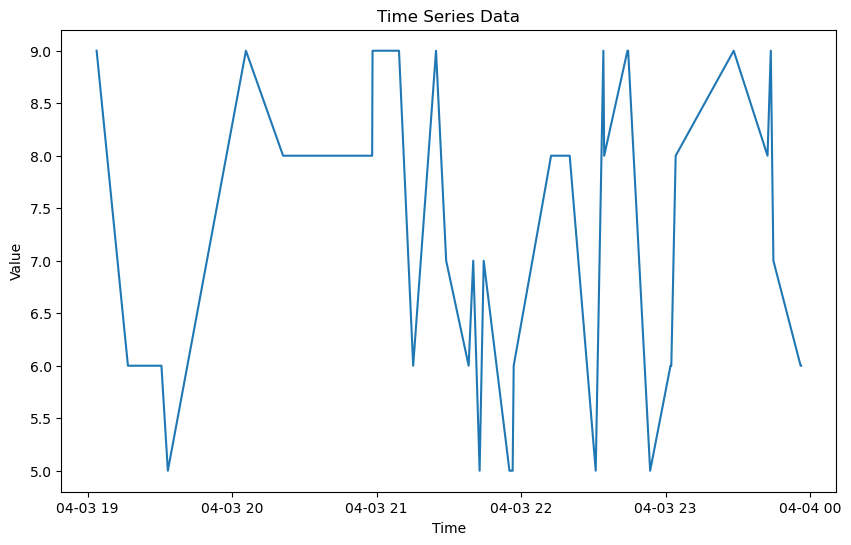

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:23 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:41  7.158809    5.500408    8.876811
1  2012-04-03 18:07:15  7.157380    5.613018    8.863632
2  2012-04-03 18:08:57  7.156848    5.499075    8.894274
3  2012-04-03 18:12:27  7.155752    5.479746    8.694695
4  2012-04-03 18:39:34  7.147265    5.440979    8.676471
5  2012-04-03 18:51:03  7.143671    5.507013    8.690788
6  2012-04-03 19:07:59  7.138371    5.535855    8.834978
7  2012-04-03 19:09:49  7.137797    5.452206    8.654607
8  2012-04-03 19:15:06  7.136143    5.521111    8.807515
9  2012-04-03 19:26:11  7.132674    5.502209    8.748585
10 2012-04-03 19:38:16  7.128893    5.486688    8.751051
11 2012-04-03 19:50:48  7.124970    5.534263    8.851267
12 2012-04-03 20:08:04  7.119565    5.461773    8.787478
13 2012-04-03 20:21:35  7.115454    5.410226    8.652477
14 2012-04-03 20:46:53  7.107758    5.449595    8.758257
15 2012-04-03 21:00:29  7.103622    5.430603    8.712720
16 2012-04-03 21:07:02  7.10162

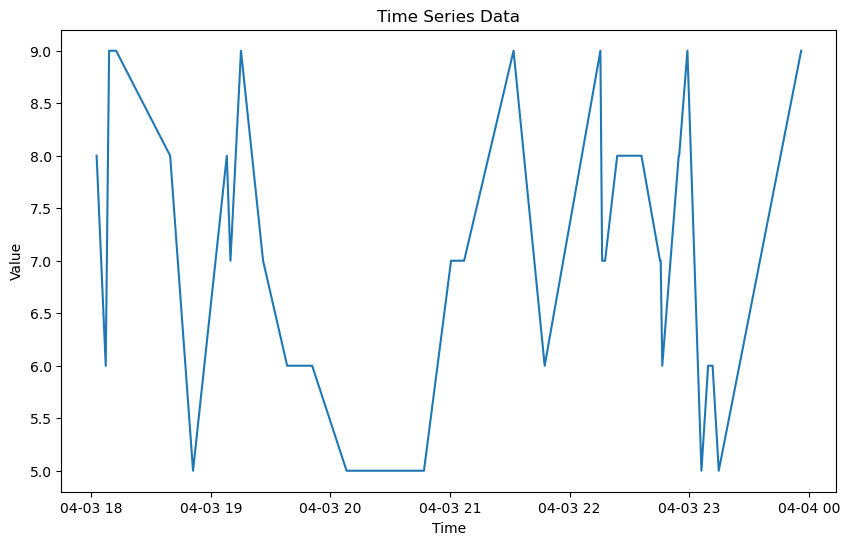

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:24 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:03:00  7.789413    6.071440    9.464231
1  2012-04-03 18:09:29  7.780916    6.076241    9.351409
2  2012-04-03 18:15:05  7.773577    6.098838    9.444156
3  2012-04-03 18:17:17  7.770694    6.173578    9.307969
4  2012-04-03 18:19:21  7.767985    5.927257    9.357571
5  2012-04-03 18:35:31  7.746797    6.223841    9.436299
6  2012-04-03 18:42:03  7.738235    6.194151    9.466257
7  2012-04-03 19:17:34  7.691688    5.991908    9.339173
8  2012-04-03 19:47:43  7.652174    5.929848    9.223730
9  2012-04-03 19:50:32  7.648456    6.132637    9.283207
10 2012-04-03 20:19:51  7.609441    5.827882    9.222934
11 2012-04-03 20:40:33  7.581893    5.880360    9.372364
12 2012-04-03 21:12:36  7.539240    5.877056    9.155570
13 2012-04-03 21:13:42  7.537776    5.797182    9.184936
14 2012-04-03 21:13:57  7.537443    5.914656    9.178677
15 2012-04-03 21:14:08  7.537199    6.057272    9.249740
16 2012-04-03 21:16:01  7.53469

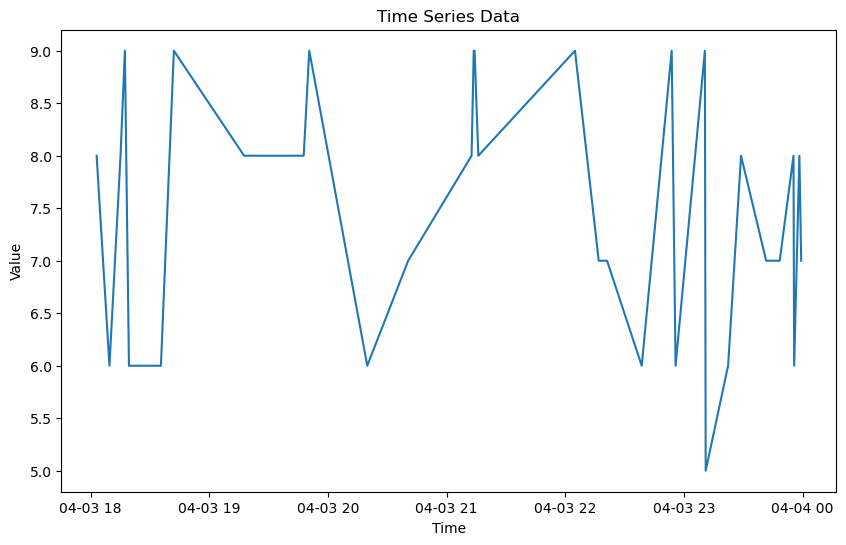

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:24 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:38  7.618481    5.755592    9.435646
1  2012-04-03 18:11:04  7.605470    5.854074    9.620559
2  2012-04-03 18:14:21  7.598829    5.772469    9.390415
3  2012-04-03 18:39:42  7.547556    5.658417    9.496965
4  2012-04-03 19:00:31  7.505453    5.631484    9.362456
5  2012-04-03 19:01:16  7.503936    5.661193    9.400202
6  2012-04-03 19:54:55  7.395425    5.470278    9.234923
7  2012-04-03 20:08:03  7.368862    5.450149    9.187949
8  2012-04-03 20:48:35  7.286880    5.478144    9.308268
9  2012-04-03 20:57:17  7.269283    5.403224    9.151704
10 2012-04-03 20:57:42  7.268441    5.437561    8.962220
11 2012-04-03 21:18:32  7.226304    5.421261    9.099608
12 2012-04-03 21:22:38  7.218011    5.455756    9.065630
13 2012-04-03 21:35:09  7.192695    5.347180    9.226936
14 2012-04-03 21:36:14  7.190504    5.282155    9.114249
15 2012-04-03 21:37:10  7.188616    5.370498    9.009298
16 2012-04-03 21:38:52  7.18517

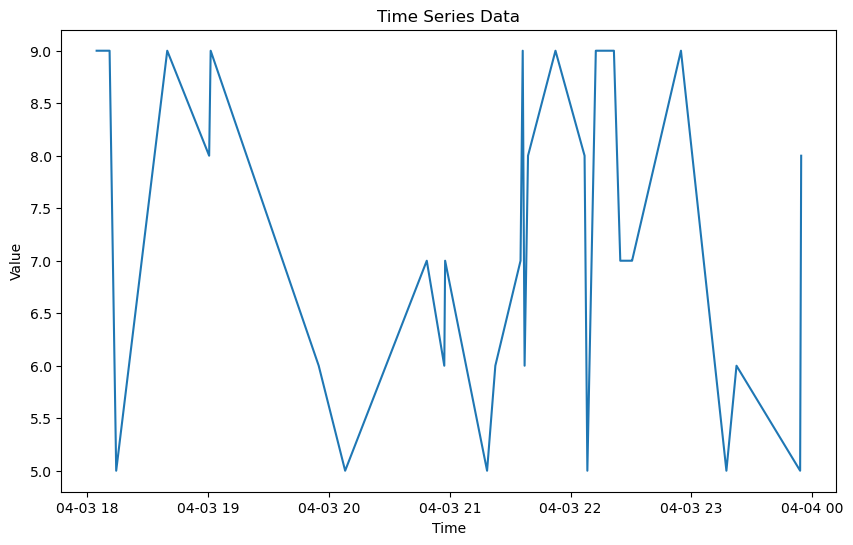

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:24 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:11:35  7.206443    5.539389    8.808936
1  2012-04-03 18:16:09  7.210020    5.711080    8.927288
2  2012-04-03 19:29:18  7.267319    5.684627    8.935924
3  2012-04-03 19:29:44  7.267659    5.678080    8.964018
4  2012-04-03 20:21:06  7.307895    5.782801    8.963352
5  2012-04-03 21:10:39  7.346709    5.613082    8.933640
6  2012-04-03 21:18:47  7.353080    5.726908    9.141051
7  2012-04-03 21:22:22  7.355887    5.783378    9.008161
8  2012-04-03 21:29:09  7.361200    5.720684    8.962152
9  2012-04-03 21:30:44  7.362440    5.758937    9.073253
10 2012-04-03 21:45:33  7.374047    5.711946    9.086844
11 2012-04-03 21:53:00  7.379882    5.710260    8.994310
12 2012-04-03 22:06:16  7.390274    5.767649    9.077280
13 2012-04-03 22:18:05  7.399531    5.711105    9.004059
14 2012-04-03 22:18:41  7.400001    5.700039    8.909909
15 2012-04-03 22:18:59  7.400236    5.816864    9.098106
16 2012-04-03 22:54:06  7.42774

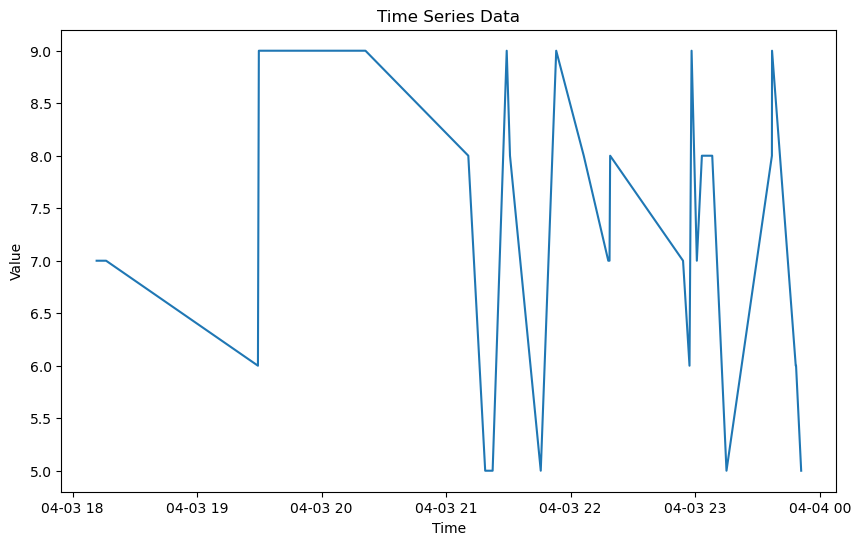

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:25 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:13:21  6.852049    5.179922    8.585331
1  2012-04-03 18:39:36  6.904584    5.234702    8.620534
2  2012-04-03 19:01:19  6.948045    5.202485    8.684753
3  2012-04-03 19:36:05  7.017625    5.322719    8.740353
4  2012-04-03 19:37:28  7.020393    5.432989    8.689421
5  2012-04-03 19:40:13  7.025897    5.197789    8.706928
6  2012-04-03 20:03:59  7.073461    5.341775    8.705397
7  2012-04-03 20:04:26  7.074362    5.249090    8.692557
8  2012-04-03 20:20:24  7.106316    5.344501    8.759958
9  2012-04-03 20:50:42  7.166956    5.482235    8.827293
10 2012-04-03 20:50:58  7.167490    5.435948    8.921604
11 2012-04-03 21:18:34  7.222726    5.525949    9.008906
12 2012-04-03 21:22:18  7.230198    5.461644    8.894326
13 2012-04-03 21:24:48  7.235201    5.459864    8.974787
14 2012-04-03 21:26:58  7.239537    5.603692    8.979110
15 2012-04-03 21:29:35  7.244774    5.471981    9.135998
16 2012-04-03 22:08:48  7.32325

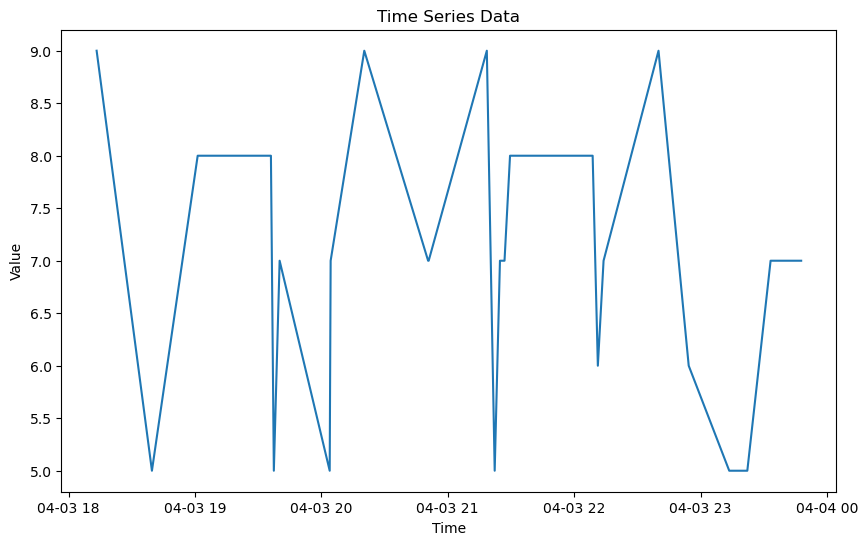

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:25 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:47:23  6.019698    4.281827    7.682777
1  2012-04-03 19:03:38  6.086578    4.502227    7.760286
2  2012-04-03 19:34:56  6.215399    4.501998    7.951345
3  2012-04-03 19:43:17  6.249765    4.566260    7.944080
4  2012-04-03 21:22:34  6.658385    4.942506    8.409801
5  2012-04-03 21:23:10  6.660855    5.052145    8.392489
6  2012-04-03 21:23:52  6.663736    4.850876    8.396984
7  2012-04-03 21:32:31  6.699337    5.068353    8.198258
8  2012-04-03 21:36:12  6.714496    5.077850    8.451232
9  2012-04-03 21:41:59  6.738299    5.086995    8.262992
10 2012-04-03 21:42:39  6.741042    5.039484    8.340868
11 2012-04-03 21:42:52  6.741934    5.153025    8.331010
12 2012-04-03 21:43:29  6.744472    5.046255    8.489155
13 2012-04-03 21:44:32  6.748794    5.163414    8.375837
14 2012-04-03 21:52:49  6.782885    5.181908    8.396030
15 2012-04-03 22:28:59  6.931736    5.194647    8.564699
16 2012-04-03 22:42:27  6.98716

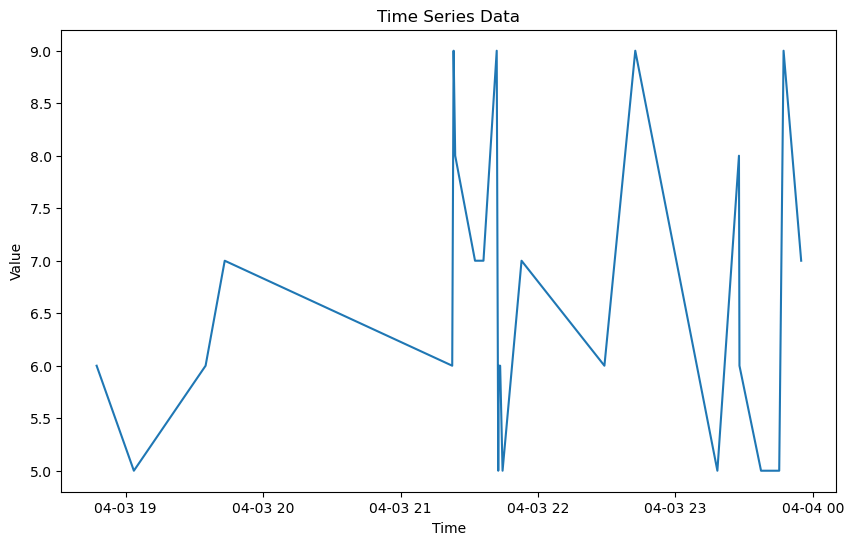

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:25 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:21:27  7.522368    5.964533    9.046356
1  2012-04-03 18:24:51  7.519976    6.086934    9.035708
2  2012-04-03 19:00:04  7.495197    6.050497    9.178256
3  2012-04-03 19:01:28  7.494212    5.982937    9.125818
4  2012-04-03 19:03:16  7.492945    5.993921    9.068842
5  2012-04-03 19:17:24  7.483001    5.857099    8.884913
6  2012-04-03 19:18:58  7.481898    6.126412    9.074736
7  2012-04-03 19:42:24  7.465410    5.958335    8.995763
8  2012-04-03 19:43:04  7.464941    5.920267    8.901170
9  2012-04-03 20:16:59  7.441077    5.844147    8.913361
10 2012-04-03 20:27:23  7.433759    5.848754    8.940437
11 2012-04-03 20:27:44  7.433513    5.971207    8.955982
12 2012-04-03 21:21:50  7.395447    5.932597    8.917729
13 2012-04-03 22:30:52  7.346874    5.731182    8.959068
14 2012-04-03 22:38:01  7.341843    5.871559    8.847835
15 2012-04-03 22:38:28  7.341526    5.882897    8.814147
16 2012-04-03 22:41:29  7.33940

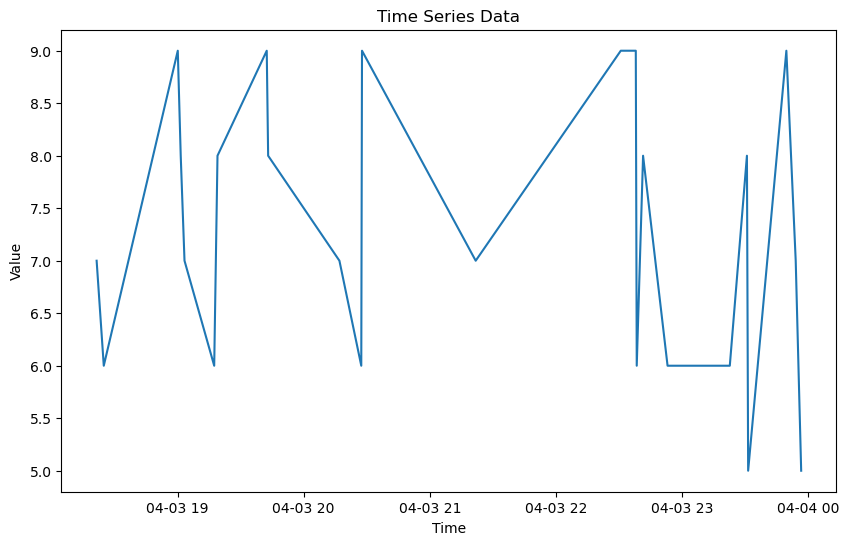

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:26 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:13:12  7.049679    5.594203    8.649290
1  2012-04-03 18:27:43  7.001025    5.398074    8.510101
2  2012-04-03 18:42:25  6.951758    5.193740    8.493272
3  2012-04-03 18:57:46  6.900311    5.289675    8.527536
4  2012-04-03 19:04:41  6.877130    5.264081    8.350027
5  2012-04-03 19:54:00  6.711843    5.162951    8.400183
6  2012-04-03 20:25:40  6.605710    4.996829    8.172577
7  2012-04-03 20:26:32  6.602806    5.071521    8.175492
8  2012-04-03 20:37:25  6.566329    4.880329    8.094089
9  2012-04-03 20:45:37  6.538847    5.033807    8.074328
10 2012-04-03 21:38:24  6.361941    4.827049    7.985825
11 2012-04-03 21:50:19  6.322002    4.703477    7.775529
12 2012-04-03 22:08:24  6.261394    4.841829    7.955304
13 2012-04-03 22:16:37  6.233856    4.675991    7.829732
14 2012-04-03 22:18:09  6.228717    4.655292    7.837166
15 2012-04-03 22:20:38  6.220394    4.642829    7.735059
16 2012-04-03 22:23:14  6.21168

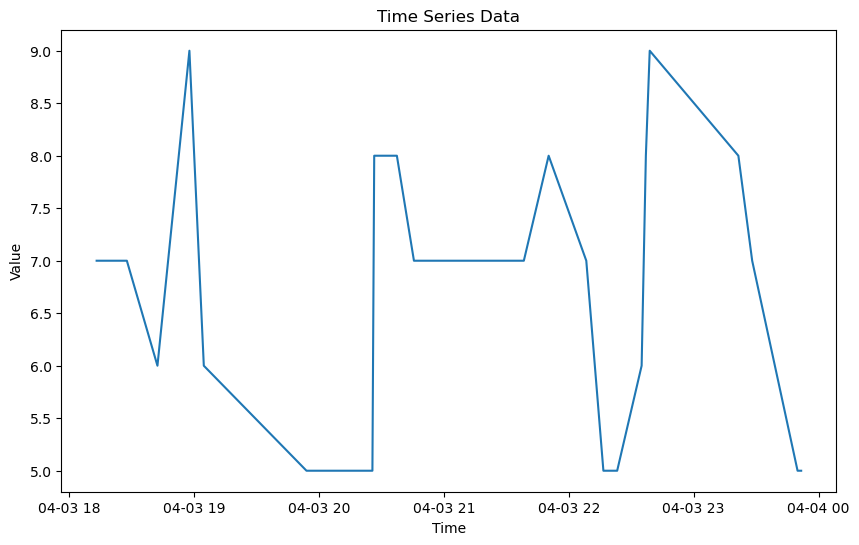

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:26 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:00:09  6.395725    5.308706    7.516064
1  2012-04-03 18:02:24  6.404404    5.339339    7.544807
2  2012-04-03 18:09:06  6.430249    5.289767    7.503464
3  2012-04-03 19:54:07  6.835338    5.699455    7.887515
4  2012-04-03 20:03:52  6.872948    5.813174    7.944830
5  2012-04-03 20:45:37  7.033993    5.851296    8.222708
6  2012-04-03 20:46:44  7.038301    5.860446    8.202398
7  2012-04-03 21:34:35  7.222876    6.172384    8.327787
8  2012-04-03 21:39:48  7.242999    6.136775    8.372091
9  2012-04-03 21:58:55  7.316739    6.231089    8.432432
10 2012-04-03 22:06:54  7.347534    6.227742    8.428464
11 2012-04-03 22:30:28  7.438440    6.322724    8.617212
12 2012-04-03 22:34:48  7.455155    6.288720    8.625859
13 2012-04-03 22:35:54  7.459398    6.370912    8.644027
14 2012-04-03 22:37:23  7.465120    6.347394    8.617255
15 2012-04-03 22:51:58  7.521374    6.371692    8.640743
16 2012-04-03 22:52:04  7.52175

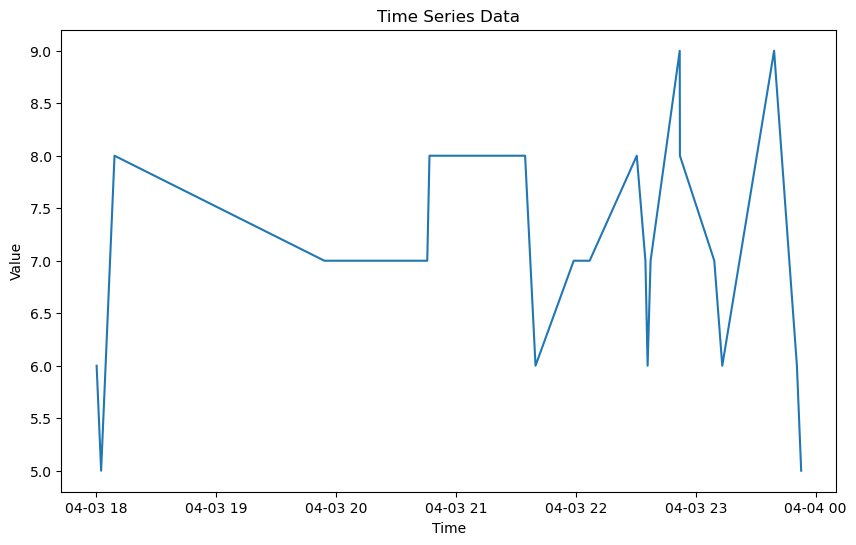

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:26 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:09:59  6.877861    5.264964    8.569958
1  2012-04-03 18:52:48  6.876988    5.166284    8.570937
2  2012-04-03 19:33:52  6.876151    5.143777    8.538720
3  2012-04-03 19:35:24  6.876120    5.169399    8.710531
4  2012-04-03 20:11:13  6.875390    5.325828    8.561299
5  2012-04-03 20:15:34  6.875301    5.272619    8.522242
6  2012-04-03 20:52:18  6.874552    5.243820    8.468216
7  2012-04-03 21:29:21  6.873797    5.129396    8.498047
8  2012-04-03 21:30:24  6.873776    5.245073    8.692614
9  2012-04-03 21:35:25  6.873673    5.224053    8.582691
10 2012-04-03 21:53:44  6.873300    5.103602    8.559777
11 2012-04-03 21:57:54  6.873215    5.238795    8.454505
12 2012-04-03 22:25:19  6.872656    5.226562    8.550083
13 2012-04-03 23:02:19  6.871902    5.157969    8.659066
14 2012-04-03 23:21:13  6.871517    5.179339    8.595414
15 2012-04-03 23:29:21  6.871351    5.204212    8.550958
16 2012-04-03 23:39:21  6.87114

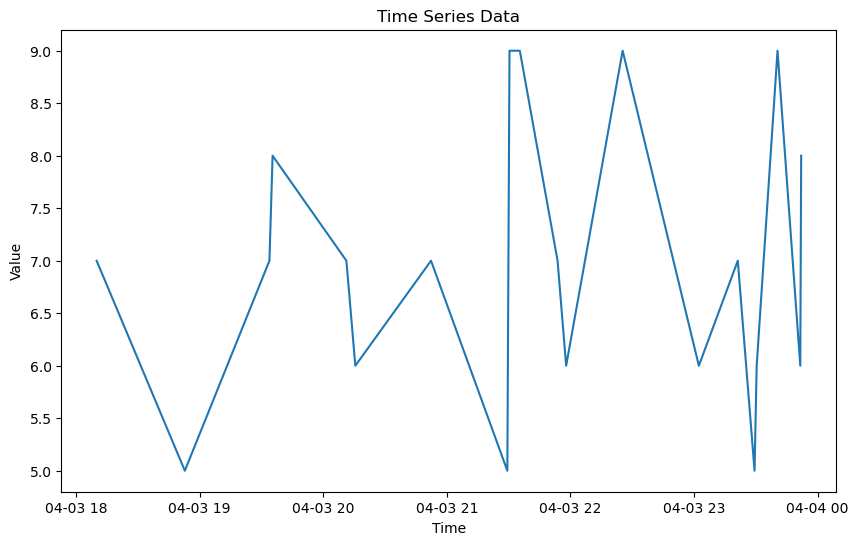

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:27 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:39:44  7.155220    5.022066    9.049374
1  2012-04-03 19:38:34  7.050265    5.083581    9.035027
2  2012-04-03 19:40:08  7.047470    4.966479    9.074146
3  2012-04-03 20:10:51  6.992673    4.943271    8.865388
4  2012-04-03 20:11:05  6.992257    4.861494    9.071389
5  2012-04-03 20:21:44  6.973258    4.994921    8.981172
6  2012-04-03 21:09:13  6.888551    5.006093    9.060017
7  2012-04-03 21:57:05  6.803159    4.854229    8.768975
8  2012-04-03 22:01:42  6.794924    4.859160    8.931030
9  2012-04-03 22:14:17  6.772476    4.754101    8.759356
10 2012-04-03 22:14:57  6.771286    4.753864    8.885418
11 2012-04-03 22:35:42  6.734270    4.759355    8.711884
12 2012-04-03 22:57:11  6.695945    4.656963    8.642784
13 2012-04-03 23:06:33  6.679235    4.861220    8.801696
14 2012-04-03 23:18:22  6.658155    4.605071    8.581369
15 2012-04-03 23:28:22  6.640316    4.521937    8.660691
16 2012-04-03 23:38:22  6.62247

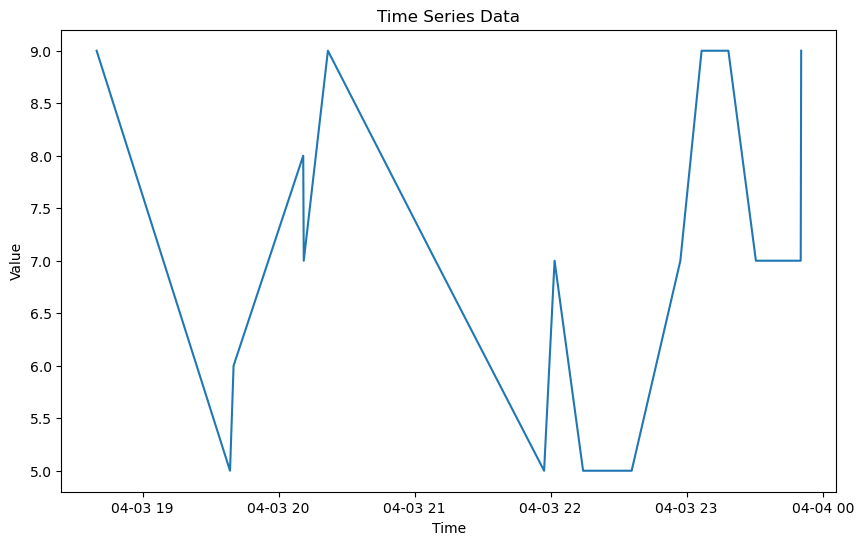

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:27 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:14:31  9.019399    7.766266   10.378044
1  2012-04-03 20:05:56  8.364095    7.021172    9.590175
2  2012-04-03 20:24:18  8.130012    6.869378    9.370850
3  2012-04-03 20:30:13  8.054604    6.806659    9.345081
4  2012-04-03 22:08:02  6.807934    5.492889    8.118653
5  2012-04-03 22:12:28  6.751431    5.458933    7.977485
6  2012-04-03 22:14:31  6.725304    5.425470    8.007591
7  2012-04-03 22:41:46  6.378003    5.115652    7.696740
8  2012-04-03 22:45:05  6.335733    5.011572    7.605393
9  2012-04-03 23:02:48  6.109934    4.832652    7.411125
10 2012-04-03 23:16:46  5.931929    4.734079    7.224390
11 2012-04-03 23:26:46  5.804480    4.409189    7.123952
12 2012-04-03 23:36:46  5.677030    4.420251    6.908976
13 2012-04-03 23:46:46  5.549580    4.264847    6.852405
14 2012-04-03 23:56:46  5.422131    4.168006    6.699629
15 2012-04-04 00:06:46  5.294681    3.999333    6.508456
16 2012-04-04 00:16:46  5.16723

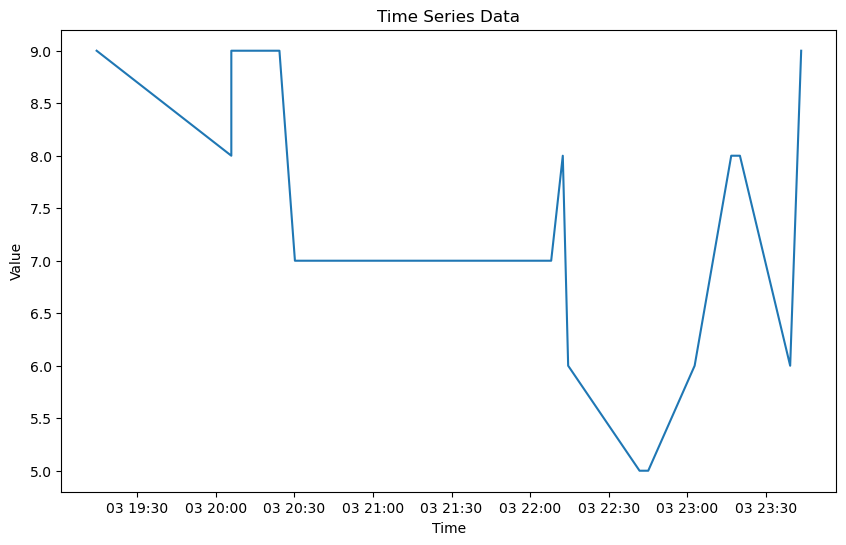

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:28 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 20:49:59  7.211370    5.646145    8.886013
1  2012-04-03 20:51:27  7.213986    5.615670    8.677222
2  2012-04-03 21:04:39  7.237534    5.612654    8.779519
3  2012-04-03 21:48:33  7.315850    5.697502    8.928868
4  2012-04-03 21:55:46  7.328725    5.759284    8.961442
5  2012-04-03 21:58:10  7.333006    5.649460    8.873575
6  2012-04-03 22:45:12  7.416912    5.824833    8.907445
7  2012-04-03 23:13:38  7.467636    5.892616    9.016928
8  2012-04-03 23:23:38  7.485476    6.029640    9.088123
9  2012-04-03 23:33:38  7.503315    5.910568    9.094785
10 2012-04-03 23:43:38  7.521155    5.807365    9.121489
11 2012-04-03 23:53:38  7.538994    6.018505    9.108825
12 2012-04-04 00:03:38  7.556834    5.930382    9.020288
13 2012-04-04 00:13:38  7.574674    6.006015    9.087221
14 2012-04-04 00:23:38  7.592513    5.925565    9.207892
15 2012-04-04 00:33:38  7.610353    5.984418    9.103775
16 2012-04-04 00:43:38  7.62819

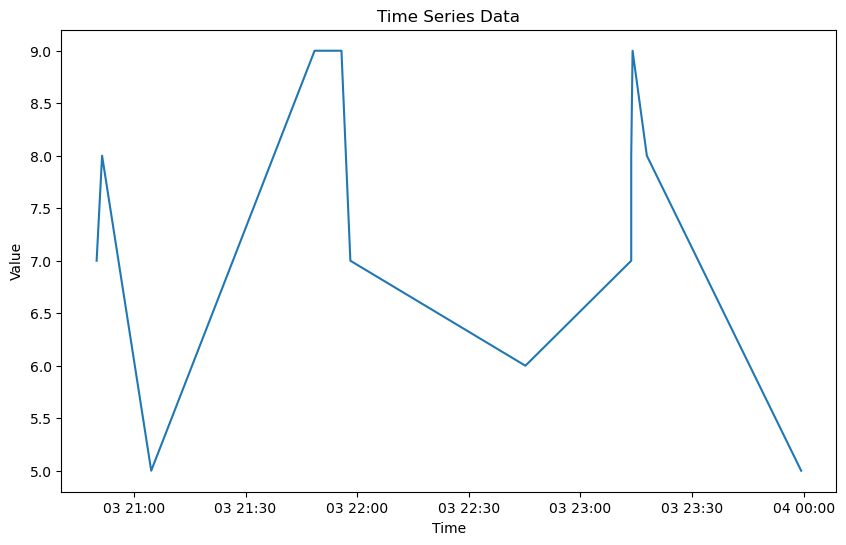

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:29 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:42  6.587437    4.857186    8.430395
1  2012-04-03 18:19:28  6.569786    4.772459    8.331164
2  2012-04-03 18:21:33  6.567296    4.786381    8.441191
3  2012-04-03 18:24:58  6.563212    4.745477    8.526294
4  2012-04-03 19:19:54  6.497549    4.681289    8.219923
5  2012-04-03 20:35:02  6.407740    4.599258    8.296529
6  2012-04-03 21:54:39  6.312573    4.571145    8.115874
7  2012-04-03 22:07:37  6.297074    4.615307    8.018138
8  2012-04-03 22:29:17  6.271175    4.430487    8.010199
9  2012-04-03 22:39:17  6.259222    4.540708    8.008678
10 2012-04-03 22:49:17  6.247269    4.370759    7.972272
11 2012-04-03 22:59:17  6.235315    4.551361    8.063690
12 2012-04-03 23:09:17  6.223362    4.384367    7.977847
13 2012-04-03 23:19:17  6.211409    4.586413    8.002961
14 2012-04-03 23:29:17  6.199456    4.391088    7.959908
15 2012-04-03 23:39:17  6.187503    4.515110    8.025805
16 2012-04-03 23:49:17  6.17554

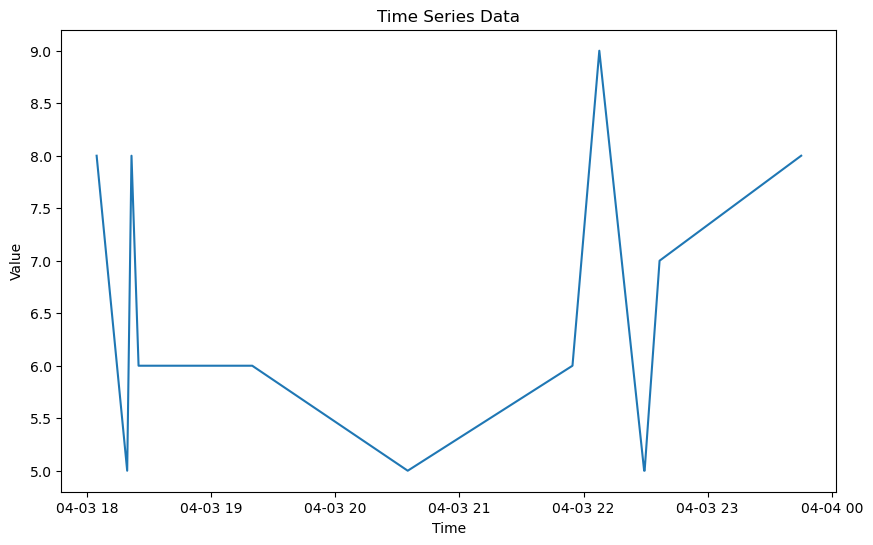

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:29 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:45:15  6.746605    4.809059    8.705345
1  2012-04-03 19:14:07  6.941604    4.986391    8.943957
2  2012-04-03 19:25:03  7.015460    5.063406    8.920712
3  2012-04-03 20:05:56  7.291634    5.342834    9.196289
4  2012-04-03 20:23:14  7.408499    5.400952    9.334281
5  2012-04-03 20:32:35  7.471659    5.445190    9.222560
6  2012-04-03 20:43:37  7.546191    5.575605    9.322633
7  2012-04-03 20:46:49  7.567808    5.486789    9.637541
8  2012-04-03 20:56:49  7.635360    5.657560    9.684956
9  2012-04-03 21:06:49  7.702911    5.692605    9.584333
10 2012-04-03 21:16:49  7.770463    5.901334    9.741911
11 2012-04-03 21:26:49  7.838015    5.872723    9.647603
12 2012-04-03 21:36:49  7.905566    5.978016    9.767480
13 2012-04-03 21:46:49  7.973118    6.147118   10.007133
14 2012-04-03 21:56:49  8.040670    6.081083   10.113466
15 2012-04-03 22:06:49  8.108221    6.058587    9.965193
16 2012-04-03 22:16:49  8.17577

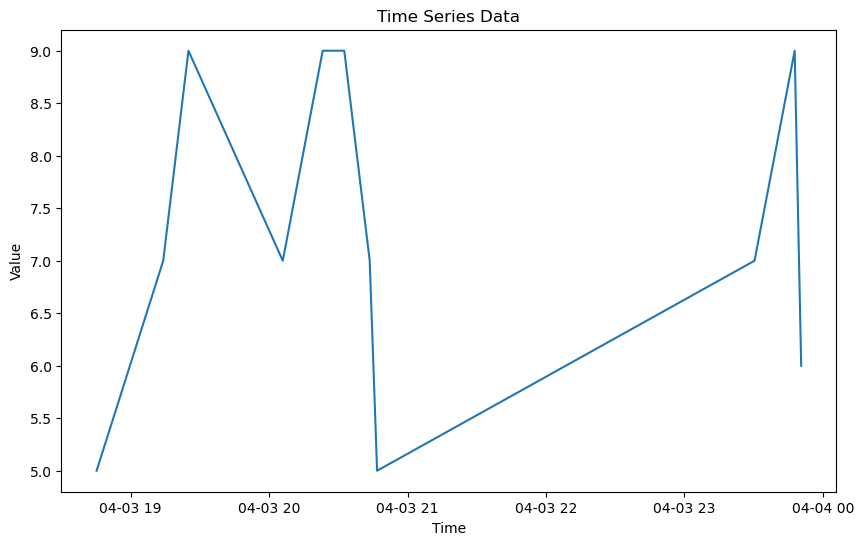

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:30 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:31:32  6.457564    5.023508    7.771919
1  2012-04-03 18:32:11  6.462113    5.130432    7.865425
2  2012-04-03 18:33:49  6.473546    5.127253    7.830071
3  2012-04-03 19:27:54  6.852108    5.510976    8.286266
4  2012-04-03 19:49:09  7.000849    5.654895    8.317177
5  2012-04-03 21:12:05  7.581349    6.312037    8.885807
6  2012-04-03 21:42:04  7.791220    6.466570    9.048398
7  2012-04-03 23:06:58  8.385486    6.956914    9.761398
8  2012-04-03 23:16:58  8.455482    7.092190    9.917469
9  2012-04-03 23:26:58  8.525478    7.079205    9.865662
10 2012-04-03 23:36:58  8.595474    7.285050    9.886615
11 2012-04-03 23:46:58  8.665470    7.369638   10.049956
12 2012-04-03 23:56:58  8.735466    7.398113   10.114087
13 2012-04-04 00:06:58  8.805462    7.461500   10.150466
14 2012-04-04 00:16:58  8.875458    7.472348   10.170828
15 2012-04-04 00:26:58  8.945454    7.547951   10.304415
16 2012-04-04 00:36:58  9.01545

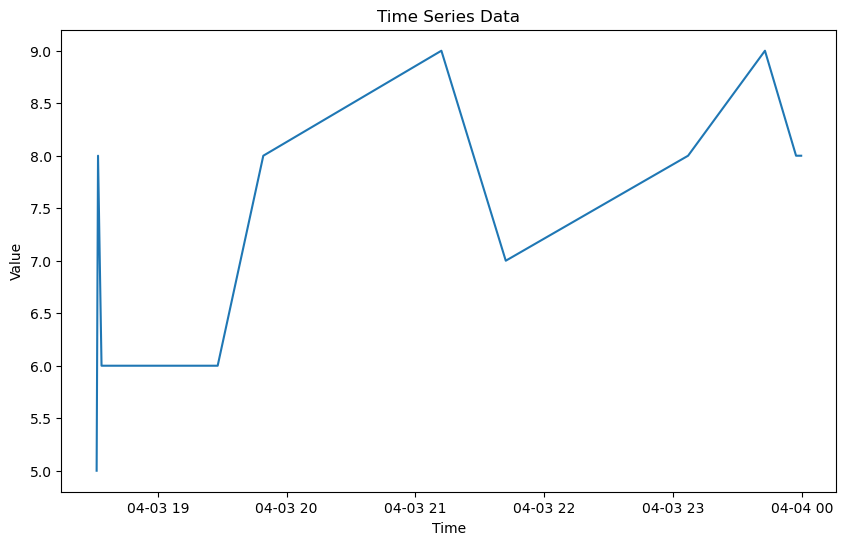

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:30 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:39  8.198672    7.012934    9.412901
1  2012-04-03 18:16:10  8.101714    6.893921    9.257396
2  2012-04-03 18:47:11  7.556583    6.402157    8.827269
3  2012-04-03 19:05:22  7.237002    5.933810    8.454289
4  2012-04-03 19:51:02  6.434390    5.183766    7.587745
5  2012-04-03 20:39:38  5.580231    4.414429    6.849927
6  2012-04-03 21:33:56  4.625893    3.463584    5.932100
7  2012-04-03 21:53:59  4.273508    3.063804    5.476484
8  2012-04-03 22:03:59  4.097755    2.876558    5.258733
9  2012-04-03 22:13:59  3.922002    2.723941    5.139834
10 2012-04-03 22:23:59  3.746249    2.450170    4.974892
11 2012-04-03 22:33:59  3.570496    2.251293    4.886702
12 2012-04-03 22:43:59  3.394743    2.104559    4.569802
13 2012-04-03 22:53:59  3.218990    1.948106    4.408681
14 2012-04-03 23:03:59  3.043238    1.790929    4.260475
15 2012-04-03 23:13:59  2.867485    1.596093    4.021323
16 2012-04-03 23:23:59  2.69173

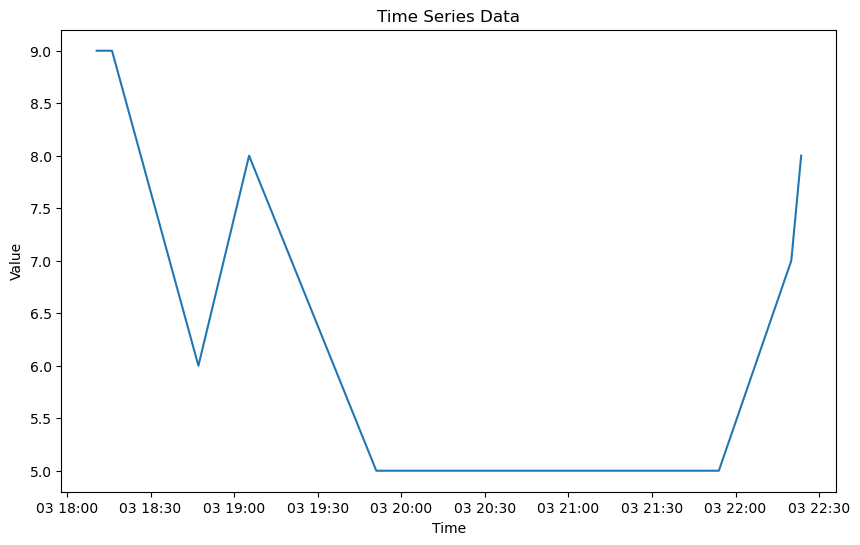

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:30 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:00  8.455900    7.193583    9.796722
1  2012-04-03 19:49:58  7.760597    6.503311    9.060500
2  2012-04-03 20:38:46  7.440395    6.257278    8.719900
3  2012-04-03 20:55:04  7.333442    5.983978    8.571685
4  2012-04-03 21:17:31  7.186136    5.874629    8.359553
5  2012-04-03 21:27:43  7.119209    5.790075    8.484052
6  2012-04-03 21:38:48  7.046485    5.788750    8.320192
7  2012-04-03 22:39:22  6.649076    5.372201    7.852734
8  2012-04-03 22:49:22  6.583460    5.268188    7.796661
9  2012-04-03 22:59:22  6.517845    5.206878    7.731646
10 2012-04-03 23:09:22  6.452230    5.177675    7.814609
11 2012-04-03 23:19:22  6.386615    5.102781    7.691271
12 2012-04-03 23:29:22  6.320999    5.069296    7.516132
13 2012-04-03 23:39:22  6.255384    4.977693    7.495416
14 2012-04-03 23:49:22  6.189769    4.916261    7.453061
15 2012-04-03 23:59:22  6.124154    4.966437    7.382755
16 2012-04-04 00:09:22  6.05853

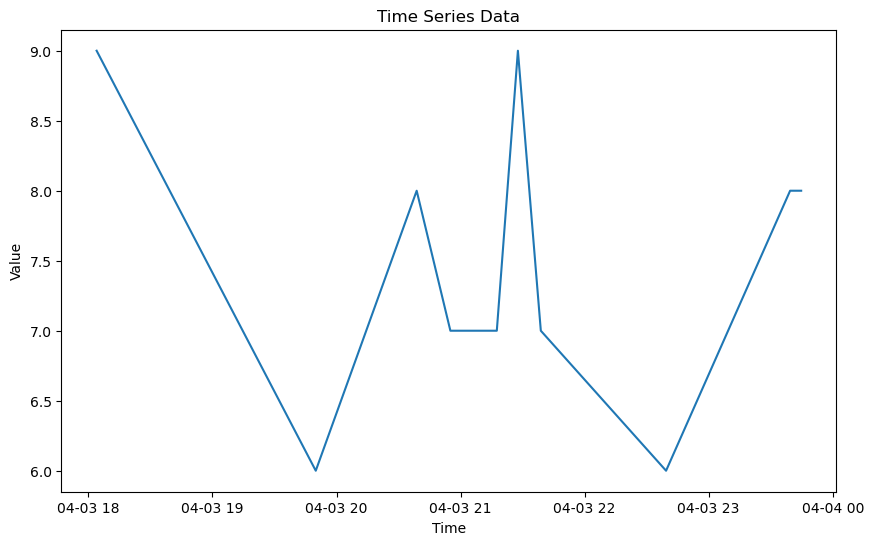

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:30 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:43:53  6.611839    5.209715    8.062301
1  2012-04-03 19:11:04  6.571096    5.196839    8.046563
2  2012-04-03 21:43:39  6.342403    4.937380    7.819502
3  2012-04-03 21:48:45  6.334759    4.921146    7.819087
4  2012-04-03 21:54:56  6.325492    4.931389    7.830555
5  2012-04-03 22:13:21  6.297889    4.938931    7.618168
6  2012-04-03 22:13:59  6.296939    4.990541    7.773910
7  2012-04-03 23:15:09  6.205262    4.891183    7.676256
8  2012-04-03 23:25:09  6.190274    4.787536    7.568406
9  2012-04-03 23:35:09  6.175286    4.808869    7.532665
10 2012-04-03 23:45:09  6.160298    4.732087    7.558007
11 2012-04-03 23:55:09  6.145310    4.767004    7.490783
12 2012-04-04 00:05:09  6.130322    4.701562    7.520808
13 2012-04-04 00:15:09  6.115334    4.725293    7.512507
14 2012-04-04 00:25:09  6.100346    4.677212    7.429891
15 2012-04-04 00:35:09  6.085358    4.652516    7.475637
16 2012-04-04 00:45:09  6.07037

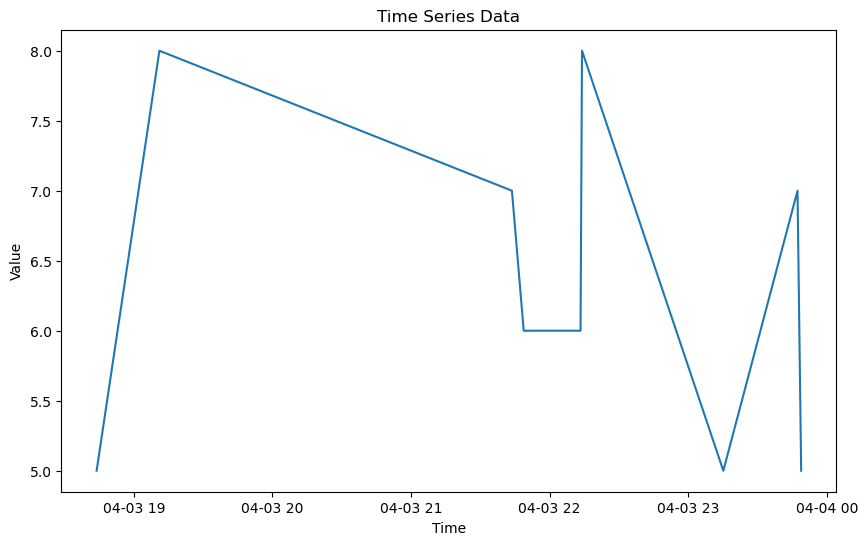

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:31 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:23:40  6.972180    5.510949    8.392047
1  2012-04-03 18:48:57  6.948911    5.437818    8.353095
2  2012-04-03 19:18:05  6.922099    5.463560    8.473055
3  2012-04-03 19:35:38  6.905947    5.424283    8.270176
4  2012-04-03 21:38:31  6.792854    5.429306    8.174309
5  2012-04-03 22:50:06  6.726973    5.346442    8.105366
6  2012-04-03 22:50:19  6.726774    5.263527    8.206161
7  2012-04-03 23:00:19  6.717571    5.227811    8.076574
8  2012-04-03 23:10:19  6.708367    5.315683    8.305754
9  2012-04-03 23:20:19  6.699164    5.273193    8.089116
10 2012-04-03 23:30:19  6.689961    5.305784    8.132052
11 2012-04-03 23:40:19  6.680757    5.212374    8.177859
12 2012-04-03 23:50:19  6.671554    5.223367    8.115630
13 2012-04-04 00:00:19  6.662351    5.232259    8.057124
14 2012-04-04 00:10:19  6.653147    5.200069    8.115663
15 2012-04-04 00:20:19  6.643944    5.239146    8.009137
16 2012-04-04 00:30:19  6.63474

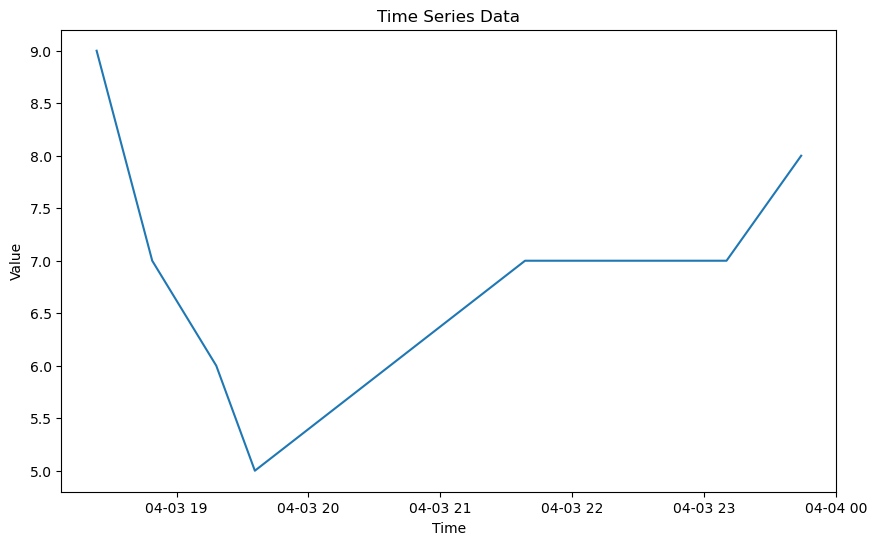

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:31 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:14:03  5.367805    4.214677    6.452074
1  2012-04-03 19:54:11  5.783962    4.752475    6.856016
2  2012-04-03 20:11:54  5.857593    4.798078    6.901895
3  2012-04-03 21:12:23  6.108964    4.967724    7.272830
4  2012-04-03 21:12:35  6.109795    4.954210    7.143252
5  2012-04-03 22:03:45  6.322446    5.281741    7.395398
6  2012-04-03 22:33:36  6.446503    5.366494    7.520478
7  2012-04-03 22:43:36  6.488064    5.327343    7.572459
8  2012-04-03 22:53:36  6.529624    5.442834    7.578865
9  2012-04-03 23:03:36  6.571184    5.410620    7.664551
10 2012-04-03 23:13:36  6.612745    5.495834    7.692102
11 2012-04-03 23:23:36  6.654305    5.638744    7.706361
12 2012-04-03 23:33:36  6.695865    5.647944    7.871408
13 2012-04-03 23:43:36  6.737426    5.644250    7.835521
14 2012-04-03 23:53:36  6.778986    5.693151    7.889947
15 2012-04-04 00:03:36  6.820546    5.687816    7.898782
16 2012-04-04 00:13:36  6.86210

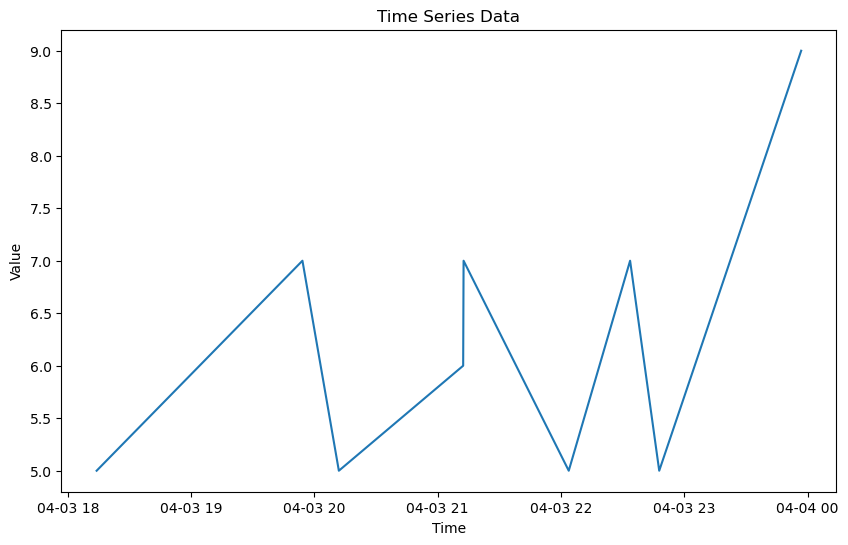

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:31 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 19:54:09   5.451722    4.309142    6.614382
1  2012-04-03 20:24:56   6.125044    5.098583    7.249697
2  2012-04-03 20:49:02   6.652182    5.509222    7.690527
3  2012-04-03 21:20:56   7.349929    6.311611    8.474874
4  2012-04-03 22:42:29   9.133666    8.054798   10.270259
5  2012-04-03 22:49:25   9.285319    8.139666   10.491021
6  2012-04-03 22:59:25   9.504048    8.326629   10.666600
7  2012-04-03 23:09:25   9.722778    8.642975   10.917085
8  2012-04-03 23:19:25   9.941507    8.824488   11.127789
9  2012-04-03 23:29:25  10.160236    9.049433   11.367510
10 2012-04-03 23:39:25  10.378966    9.194922   11.471258
11 2012-04-03 23:49:25  10.597695    9.470390   11.729995
12 2012-04-03 23:59:25  10.816424    9.660374   11.870570
13 2012-04-04 00:09:25  11.035154    9.911139   12.190999
14 2012-04-04 00:19:25  11.253883   10.139534   12.352125
15 2012-04-04 00:29:25  11.472612   10.306935   12.624101


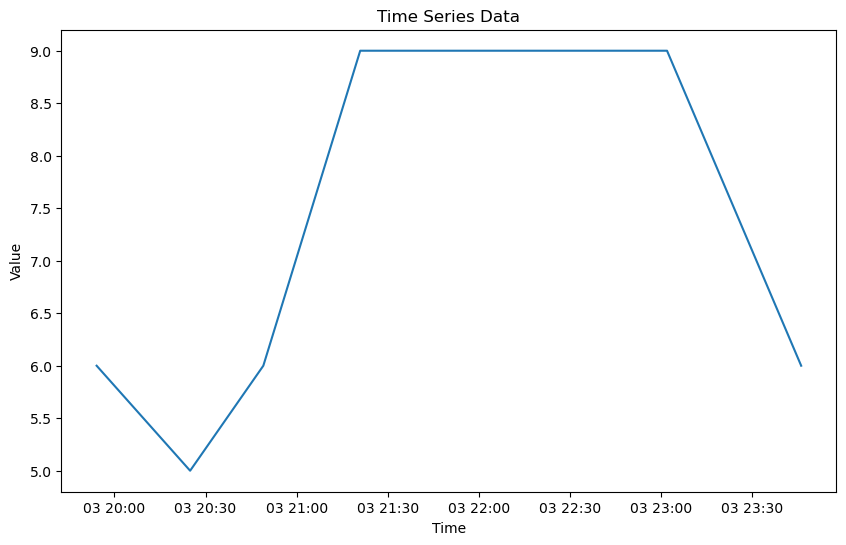

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:32 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:57:44  6.141271    4.651558    7.646198
1  2012-04-03 19:58:01  6.142493    4.509640    7.611811
2  2012-04-03 21:55:05  6.647312    5.089641    7.995198
3  2012-04-03 21:57:17  6.656799    5.143410    8.247572
4  2012-04-03 21:57:55  6.659530    5.170429    8.250866
5  2012-04-03 22:18:10  6.746853    5.227332    8.273731
6  2012-04-03 22:28:10  6.789976    5.275894    8.478312
7  2012-04-03 22:38:10  6.833098    5.282991    8.511225
8  2012-04-03 22:48:10  6.876220    5.289679    8.355827
9  2012-04-03 22:58:10  6.919343    5.289063    8.501910
10 2012-04-03 23:08:10  6.962465    5.411111    8.497615
11 2012-04-03 23:18:10  7.005588    5.468153    8.533760
12 2012-04-03 23:28:10  7.048710    5.403265    8.616191
13 2012-04-03 23:38:10  7.091832    5.545513    8.601976
14 2012-04-03 23:48:10  7.134955    5.611650    8.637437
15 2012-04-03 23:58:10  7.178077    5.645845    8.727383


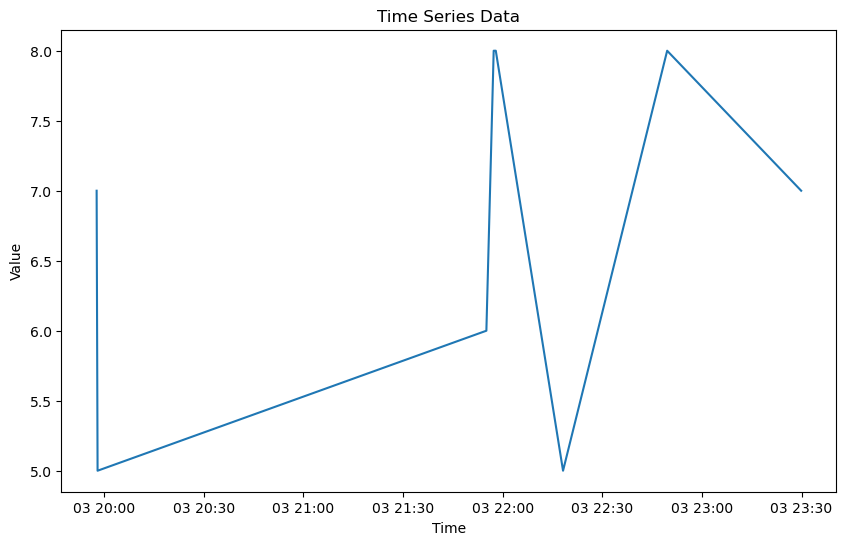

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:32 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:58:56  7.978176    7.013109    8.908108
1  2012-04-03 20:03:06  8.177624    7.273221    9.178247
2  2012-04-03 20:07:05  8.190005    7.321980    9.191591
3  2012-04-03 23:13:24  8.769129    7.809328    9.690060
4  2012-04-03 23:50:48  8.885378    7.969290    9.712581
5  2012-04-04 00:00:48  8.916461    7.999156    9.875862
6  2012-04-04 00:10:48  8.947544    8.009644    9.872706
7  2012-04-04 00:20:48  8.978627    8.051113    9.898307
8  2012-04-04 00:30:48  9.009709    8.170424    9.938035
9  2012-04-04 00:40:48  9.040792    8.041215    9.961184
10 2012-04-04 00:50:48  9.071875    8.229703    9.950649
11 2012-04-04 01:00:48  9.102958    8.194503    9.944366
12 2012-04-04 01:10:48  9.134040    8.207553   10.022205
13 2012-04-04 01:20:48  9.165123    8.287043   10.038628
14 2012-04-04 01:30:48  9.196206    8.318302   10.104555


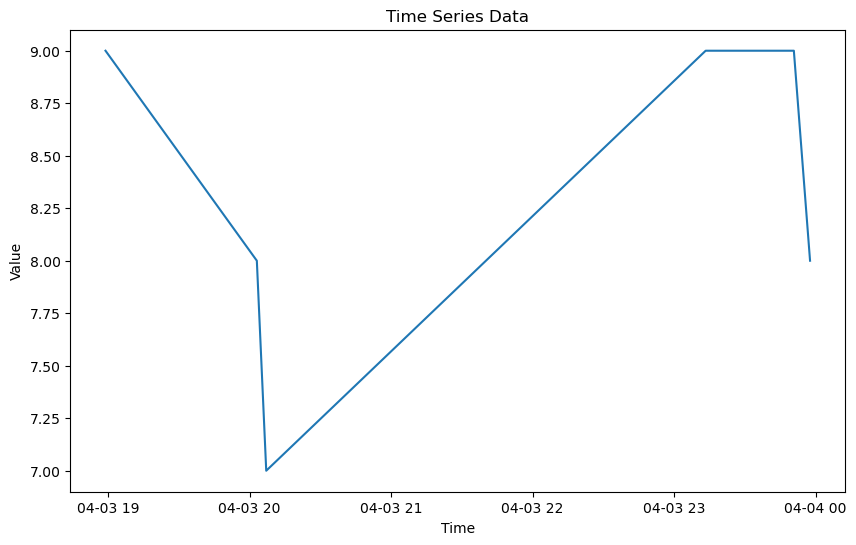

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:32 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:19:25  5.489507    4.133103    6.834804
1  2012-04-03 18:34:10  5.749281    4.427517    7.089718
2  2012-04-03 18:42:32  5.896634    4.580575    7.247356
3  2012-04-03 20:07:29  7.392756    6.044180    8.751074
4  2012-04-03 20:11:45  7.467900    6.110229    8.823786
5  2012-04-03 20:21:45  7.644018    6.324636    8.996850
6  2012-04-03 20:31:45  7.820136    6.412701    9.273028
7  2012-04-03 20:41:45  7.996254    6.640794    9.350462
8  2012-04-03 20:51:45  8.172372    6.783306    9.561056
9  2012-04-03 21:01:45  8.348490    6.979162    9.765073
10 2012-04-03 21:11:45  8.524608    7.204206    9.833829
11 2012-04-03 21:21:45  8.700726    7.347634   10.033461
12 2012-04-03 21:31:45  8.876844    7.420183   10.248908
13 2012-04-03 21:41:45  9.052962    7.716348   10.277974
14 2012-04-03 21:51:45  9.229080    7.919356   10.520523


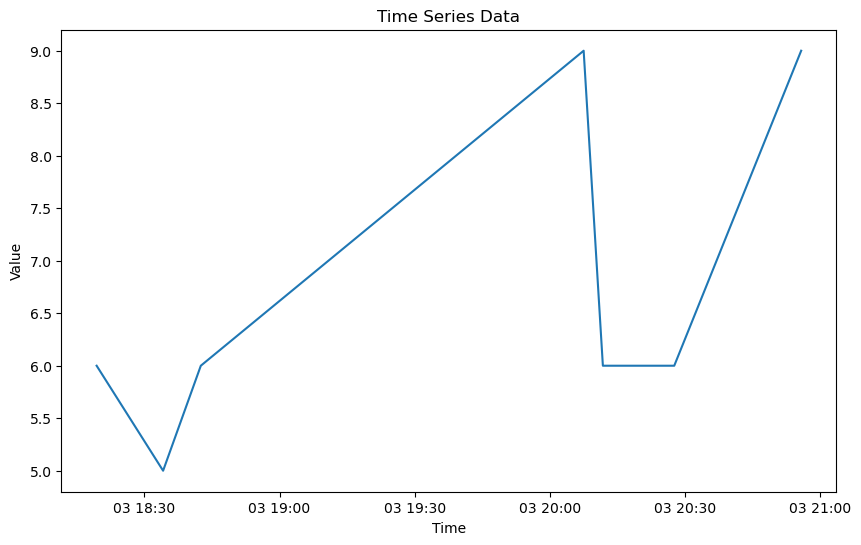

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:33 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:44:07  6.383732    5.848053    6.922685
1  2012-04-03 19:30:24  7.044247    6.516783    7.559229
2  2012-04-03 20:00:39  7.475948    6.944830    7.936551
3  2012-04-03 20:09:55  7.608194    7.089770    8.083859
4  2012-04-03 21:11:33  8.487770    7.963149    8.997345
5  2012-04-03 21:21:33  8.630481    8.136266    9.147154
6  2012-04-03 21:31:33  8.773192    8.262624    9.266409
7  2012-04-03 21:41:33  8.915903    8.424241    9.429461
8  2012-04-03 21:51:33  9.058614    8.579144    9.587196
9  2012-04-03 22:01:33  9.201325    8.695509    9.716689
10 2012-04-03 22:11:33  9.344036    8.818371    9.865686
11 2012-04-03 22:21:33  9.486747    8.990130    9.983499
12 2012-04-03 22:31:33  9.629458    9.111068   10.108259
13 2012-04-03 22:41:33  9.772169    9.231103   10.287933
14 2012-04-03 22:51:33  9.914881    9.446721   10.425640


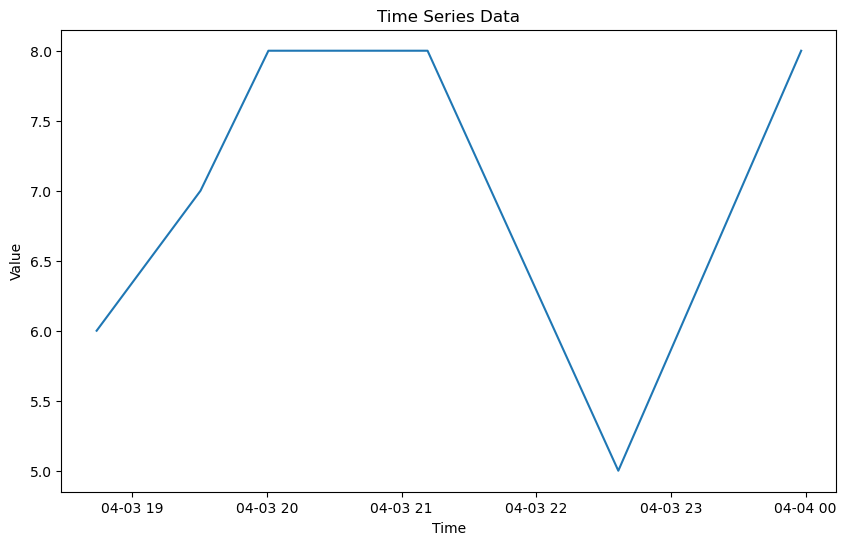

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:33 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:01:40  9.214939    8.314877   10.002565
1  2012-04-03 20:03:56  7.769129    6.932365    8.589686
2  2012-04-03 20:04:11  7.763324    6.894803    8.592275
3  2012-04-03 20:29:37  7.172771    6.321825    8.071270
4  2012-04-03 21:59:28  5.086485    4.285093    5.932101
5  2012-04-03 22:09:28  4.854289    3.930558    5.718678
6  2012-04-03 22:19:28  4.622092    3.728564    5.450121
7  2012-04-03 22:29:28  4.389896    3.564307    5.306534
8  2012-04-03 22:39:28  4.157699    3.234498    5.017240
9  2012-04-03 22:49:28  3.925503    3.065828    4.776187
10 2012-04-03 22:59:28  3.693306    2.799064    4.468229
11 2012-04-03 23:09:28  3.461110    2.574710    4.257017
12 2012-04-03 23:19:28  3.228913    2.371465    4.049244
13 2012-04-03 23:29:28  2.996717    2.154575    3.848723
14 2012-04-03 23:39:28  2.764520    1.929828    3.603091


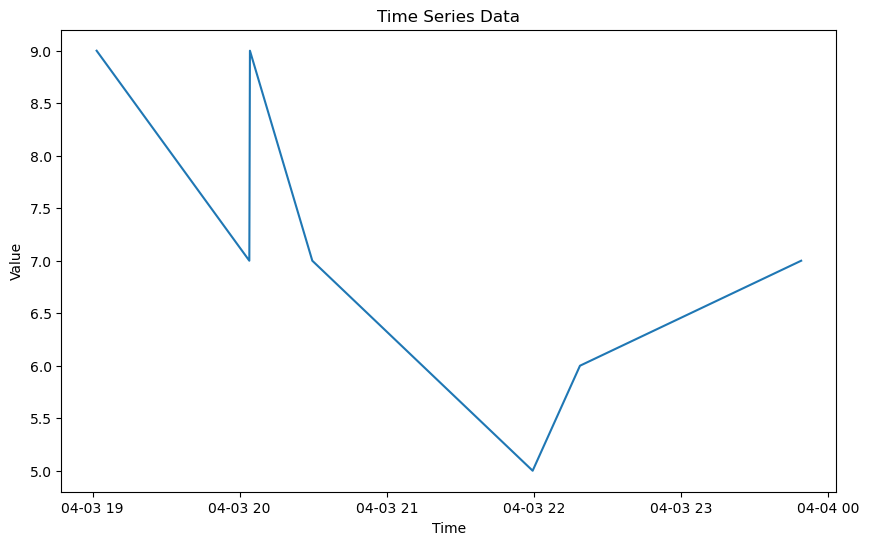

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:33 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:25:46  6.607548    5.833117    7.339676
1  2012-04-03 21:32:01  5.867905    5.087820    6.625481
2  2012-04-03 23:15:18  5.262813    4.432061    6.051496
3  2012-04-03 23:15:50  5.259688    4.509955    6.011992
4  2012-04-03 23:25:50  5.201103    4.403542    5.996462
5  2012-04-03 23:35:50  5.142517    4.392581    5.973704
6  2012-04-03 23:45:50  5.083932    4.304368    5.849241
7  2012-04-03 23:55:50  5.025346    4.263082    5.789977
8  2012-04-04 00:05:50  4.966760    4.188756    5.771093
9  2012-04-04 00:15:50  4.908175    4.229136    5.695935
10 2012-04-04 00:25:50  4.849589    4.056882    5.630344
11 2012-04-04 00:35:50  4.791003    4.007615    5.565132
12 2012-04-04 00:45:50  4.732418    3.962400    5.521869
13 2012-04-04 00:55:50  4.673832    3.933094    5.429546


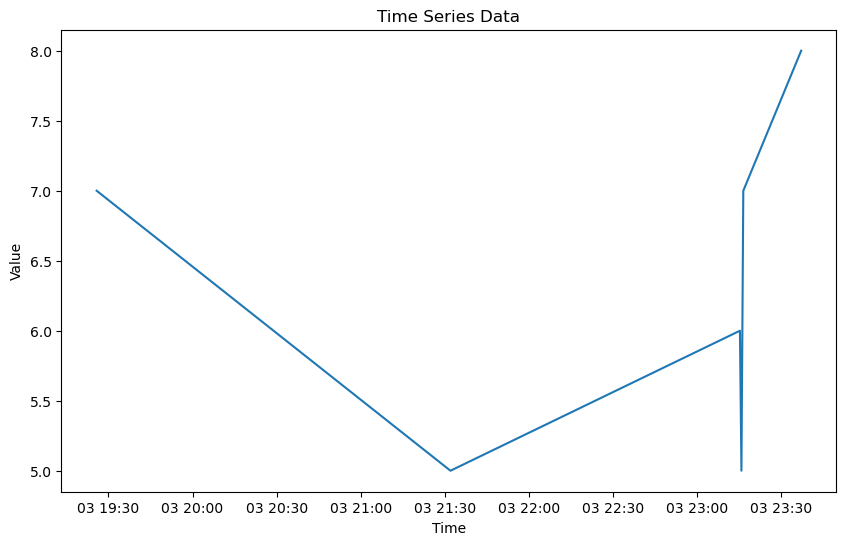

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:34 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:08:42  8.081336    7.188490    8.907488
1  2012-04-03 20:05:43  7.067545    6.200552    7.871847
2  2012-04-03 20:11:54  6.957602    6.132282    7.839110
3  2012-04-03 20:15:46  6.888850    6.015640    7.701651
4  2012-04-03 20:25:46  6.711044    5.819049    7.578327
5  2012-04-03 20:35:46  6.533238    5.621794    7.378623
6  2012-04-03 20:45:46  6.355432    5.489453    7.166594
7  2012-04-03 20:55:46  6.177626    5.371393    7.119780
8  2012-04-03 21:05:46  5.999820    5.120089    6.844498
9  2012-04-03 21:15:46  5.822014    4.905084    6.707883
10 2012-04-03 21:25:46  5.644207    4.752664    6.472530
11 2012-04-03 21:35:46  5.466401    4.632193    6.329463
12 2012-04-03 21:45:46  5.288595    4.458057    6.172420
13 2012-04-03 21:55:46  5.110789    4.228640    6.000237


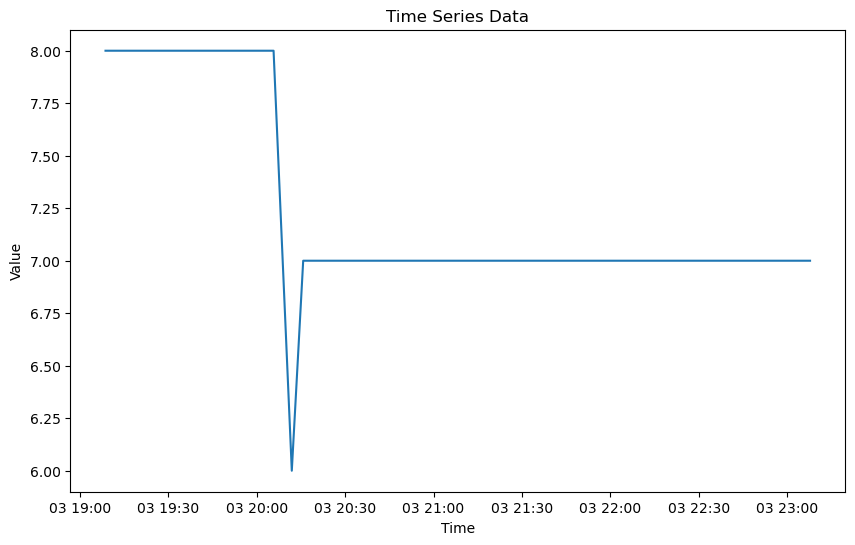

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:34 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:24:28  8.685268    7.488458    9.911103
1  2012-04-03 20:57:14  6.653638    5.361649    8.005020
2  2012-04-03 20:57:27  6.648893    5.381536    7.934598
3  2012-04-03 21:26:35  6.010860    4.708226    7.303735
4  2012-04-03 21:36:35  5.791856    4.528943    7.139366
5  2012-04-03 21:46:35  5.572851    4.310186    6.907160
6  2012-04-03 21:56:35  5.353847    4.139468    6.566082
7  2012-04-03 22:06:35  5.134842    3.788014    6.464994
8  2012-04-03 22:16:35  4.915838    3.751570    6.161901
9  2012-04-03 22:26:35  4.696834    3.342525    5.939227
10 2012-04-03 22:36:35  4.477829    3.213104    5.727643
11 2012-04-03 22:46:35  4.258825    3.047717    5.465662
12 2012-04-03 22:56:35  4.039821    2.770981    5.351249
13 2012-04-03 23:06:35  3.820816    2.573670    5.162448


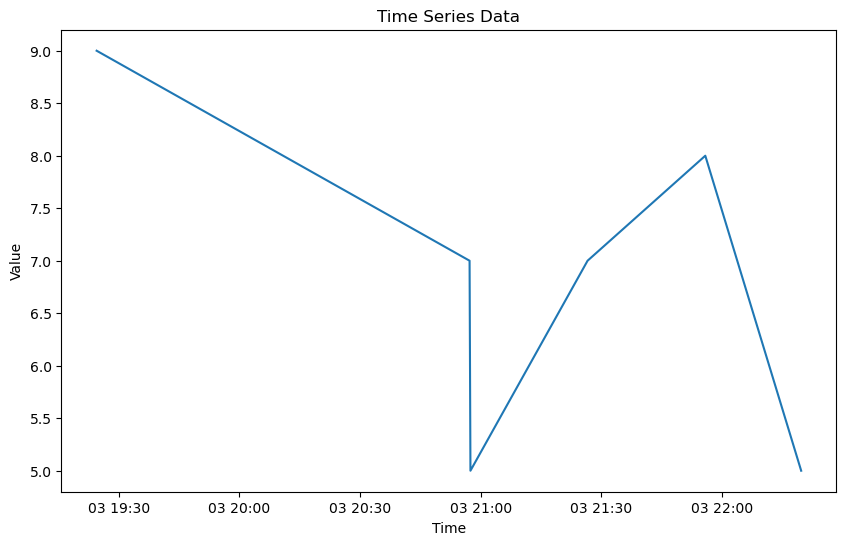

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:35 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:19:39  6.460292    5.145915    7.979953
1  2012-04-03 19:20:46  6.443833    5.068515    7.816161
2  2012-04-03 20:38:50  5.293212    3.851171    6.571091
3  2012-04-03 21:13:54  4.776366    3.365526    6.000307
4  2012-04-03 21:23:54  4.628977    3.275187    5.988972
5  2012-04-03 21:33:54  4.481587    3.154085    5.916443
6  2012-04-03 21:43:54  4.334197    3.062260    5.675420
7  2012-04-03 21:53:54  4.186808    2.831749    5.530825
8  2012-04-03 22:03:54  4.039418    2.727323    5.473396
9  2012-04-03 22:13:54  3.892029    2.517495    5.189033
10 2012-04-03 22:23:54  3.744639    2.472711    5.064401
11 2012-04-03 22:33:54  3.597250    2.192684    4.984754
12 2012-04-03 22:43:54  3.449860    2.108721    4.702476
13 2012-04-03 22:53:54  3.302471    1.973487    4.764622


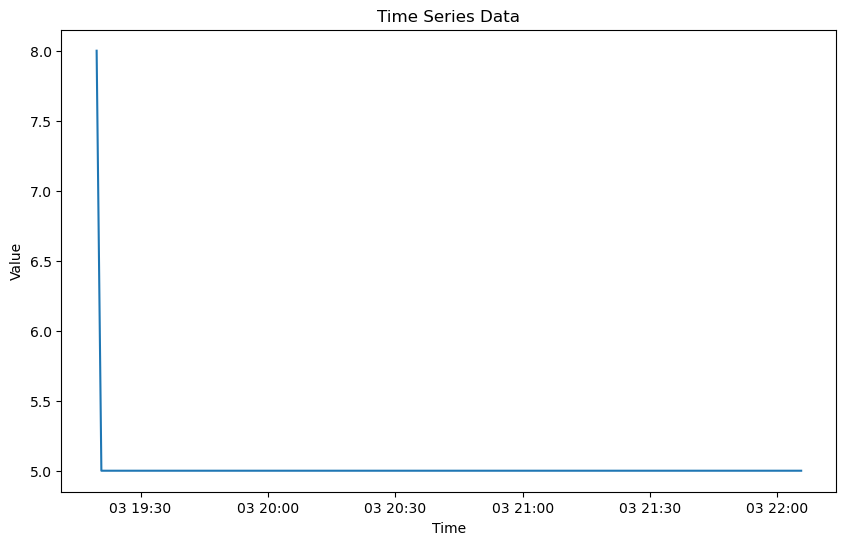

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:35 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:19:07  6.198257    4.545663    7.815460
1  2012-04-03 20:07:51  7.335224    5.761297    8.919100
2  2012-04-03 21:36:37  8.263410    6.510938    9.836401
3  2012-04-03 21:46:37  8.367975    6.626259   10.088472
4  2012-04-03 21:56:37  8.472539    6.780671   10.105766
5  2012-04-03 22:06:37  8.577104    6.825269   10.221648
6  2012-04-03 22:16:37  8.681669    6.978126   10.322265
7  2012-04-03 22:26:37  8.786234    7.055098   10.584867
8  2012-04-03 22:36:37  8.890798    7.190601   10.543964
9  2012-04-03 22:46:37  8.995363    7.309777   10.580404
10 2012-04-03 22:56:37  9.099928    7.468075   10.809819
11 2012-04-03 23:06:37  9.204492    7.460379   10.966066
12 2012-04-03 23:16:37  9.309057    7.636524   10.989550


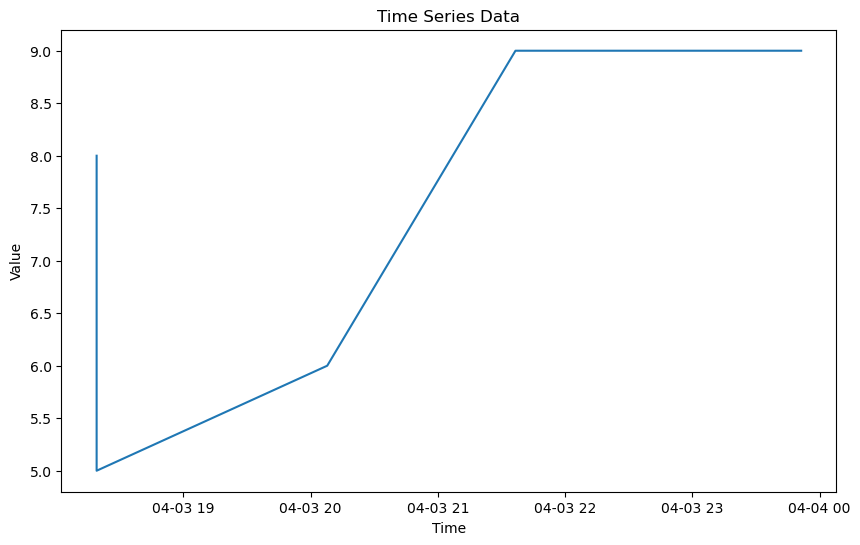

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:35 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:09:18  6.175774    4.094697    8.133394
1  2012-04-03 20:42:26  6.238678    4.142511    8.236206
2  2012-04-03 21:49:54  6.284246    4.227092    8.331638
3  2012-04-03 22:02:54  6.293026    4.200814    8.387196
4  2012-04-03 22:12:54  6.299780    4.131941    8.297194
5  2012-04-03 22:22:54  6.306535    4.225232    8.270933
6  2012-04-03 22:32:54  6.313289    4.273226    8.226872
7  2012-04-03 22:42:54  6.320043    4.279129    8.378194
8  2012-04-03 22:52:54  6.326797    4.370048    8.331465
9  2012-04-03 23:02:54  6.333551    4.230838    8.490799
10 2012-04-03 23:12:54  6.340305    4.269291    8.354151
11 2012-04-03 23:22:54  6.347060    4.378181    8.268365
12 2012-04-03 23:32:54  6.353814    4.287517    8.305971
13 2012-04-03 23:42:54  6.360568    4.318693    8.398228


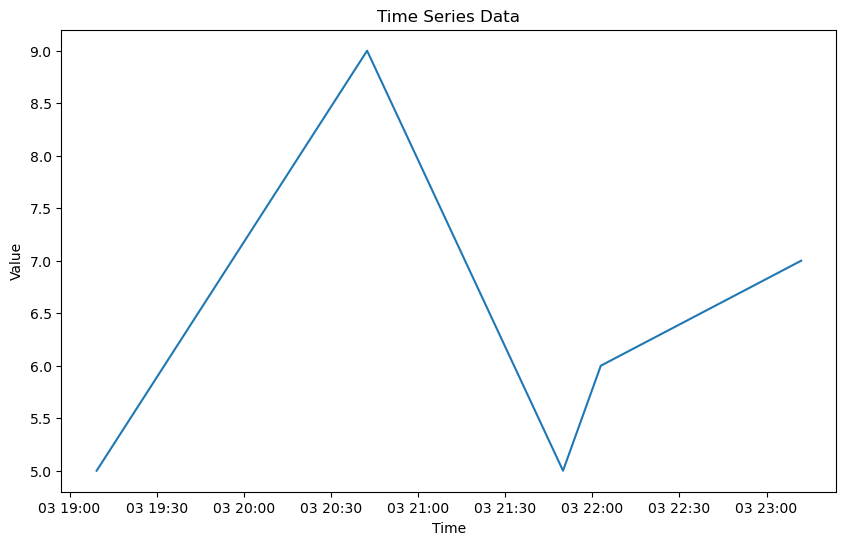

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:35 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:26:31  6.949649    5.527545    8.450766
1  2012-04-03 19:42:40  6.454787    4.947986    7.932691
2  2012-04-03 20:00:37  5.904771    4.320085    7.335289
3  2012-04-03 20:07:48  5.684663    4.226054    7.102568
4  2012-04-03 20:17:48  5.378247    3.788973    6.958825
5  2012-04-03 20:27:48  5.071831    3.523431    6.541978
6  2012-04-03 20:37:48  4.765416    3.106681    6.213769
7  2012-04-03 20:47:48  4.459000    2.932189    5.949616
8  2012-04-03 20:57:48  4.152584    2.596791    5.729111
9  2012-04-03 21:07:48  3.846168    2.298711    5.271348
10 2012-04-03 21:17:48  3.539753    2.106357    5.052630
11 2012-04-03 21:27:48  3.233337    1.623921    4.638400
12 2012-04-03 21:37:48  2.926921    1.370771    4.452634
13 2012-04-03 21:47:48  2.620506    1.141186    4.206882


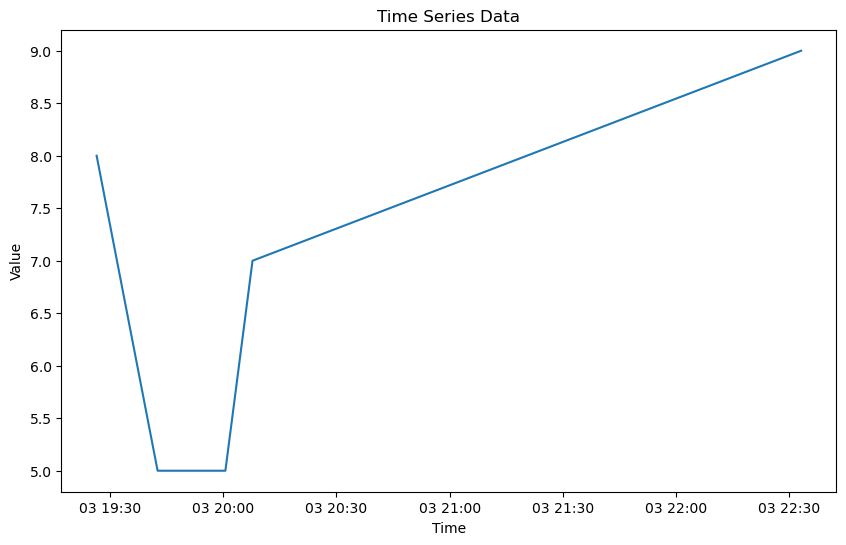

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:36 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:12:42  8.795056    7.325794   10.141740
1  2012-04-03 19:14:15  7.892952    6.471733    9.337605
2  2012-04-03 20:01:38  7.198481    5.786964    8.498720
3  2012-04-03 21:16:02  6.108041    4.622709    7.474958
4  2012-04-03 21:26:02  5.961477    4.437714    7.422083
5  2012-04-03 21:36:02  5.814912    4.457463    7.230565
6  2012-04-03 21:46:02  5.668348    4.173993    7.142002
7  2012-04-03 21:56:02  5.521783    4.111915    6.979655
8  2012-04-03 22:06:02  5.375219    3.985017    6.754193
9  2012-04-03 22:16:02  5.228654    3.837239    6.711299
10 2012-04-03 22:26:02  5.082090    3.619894    6.481133
11 2012-04-03 22:36:02  4.935525    3.507905    6.449341
12 2012-04-03 22:46:02  4.788961    3.376674    6.200369
13 2012-04-03 22:56:02  4.642397    3.155305    6.058057


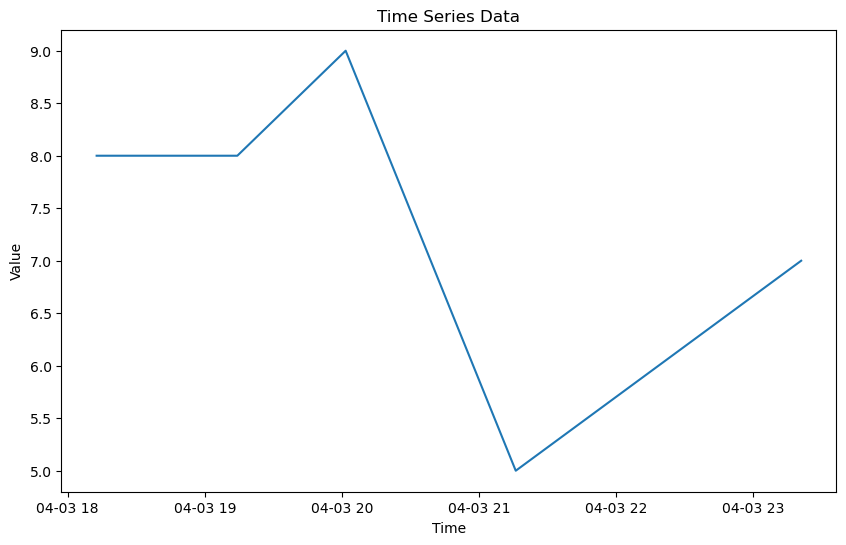

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:36 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:12:08  6.366589    4.986828    7.780262
1  2012-04-03 19:14:34  6.342465    4.961099    7.700656
2  2012-04-03 19:15:04  6.337508    5.101623    7.831086
3  2012-04-03 21:32:16  4.977316    3.598002    6.398274
4  2012-04-03 21:42:16  4.878177    3.420618    6.124500
5  2012-04-03 21:52:16  4.779037    3.386216    6.117814
6  2012-04-03 22:02:16  4.679898    3.255068    5.964338
7  2012-04-03 22:12:16  4.580759    3.174817    5.827864
8  2012-04-03 22:22:16  4.481619    3.058252    5.765744
9  2012-04-03 22:32:16  4.382480    3.021912    5.796421
10 2012-04-03 22:42:16  4.283340    2.941905    5.582985
11 2012-04-03 22:52:16  4.184201    2.764294    5.487376
12 2012-04-03 23:02:16  4.085062    2.637232    5.421755
13 2012-04-03 23:12:16  3.985922    2.562120    5.370708


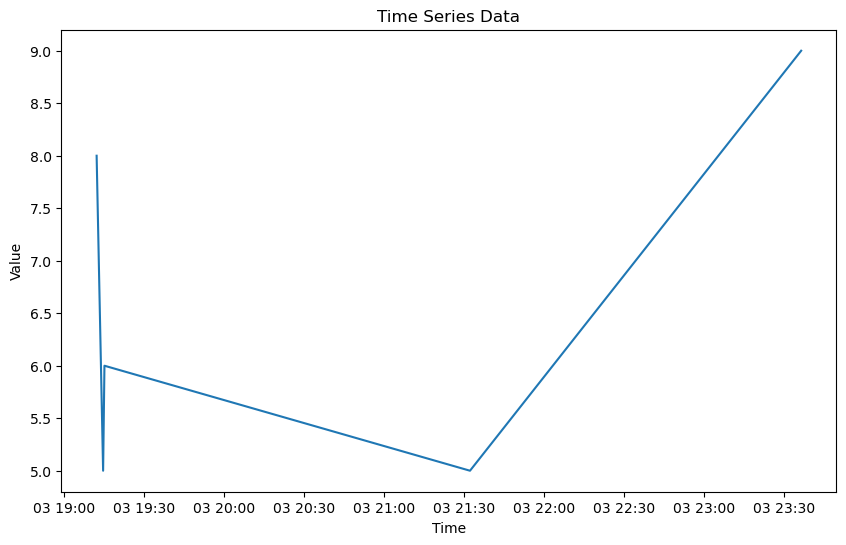

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:36 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 19:29:36  5.706132    5.035174    6.308942
1  2012-04-03 20:54:05  6.803570    6.149958    7.450646
2  2012-04-03 21:44:53  7.463462    6.829202    8.099364
3  2012-04-03 22:28:11  8.025929    7.316087    8.665814
4  2012-04-03 22:38:11  8.155829    7.562346    8.778381
5  2012-04-03 22:48:11  8.285729    7.619156    8.870794
6  2012-04-03 22:58:11  8.415629    7.809877    9.110601
7  2012-04-03 23:08:11  8.545529    7.876257    9.192724
8  2012-04-03 23:18:11  8.675429    8.051856    9.340164
9  2012-04-03 23:28:11  8.805329    8.192505    9.458982
10 2012-04-03 23:38:11  8.935229    8.301259    9.576388
11 2012-04-03 23:48:11  9.065129    8.474297    9.698306
12 2012-04-03 23:58:11  9.195029    8.577782    9.843991
13 2012-04-04 00:08:11  9.324929    8.643391    9.954340


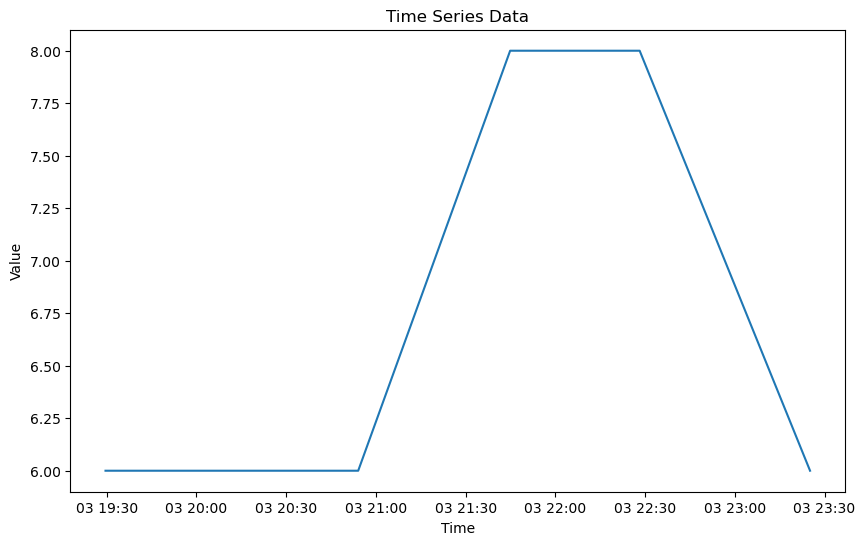

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:37 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:18:54  8.248282    6.917826    9.673742
1  2012-04-03 19:45:22  7.578933    6.183840    8.968293
2  2012-04-03 21:54:09  6.582005    5.231964    7.927381
3  2012-04-03 21:54:54  6.576199    5.078474    7.958371
4  2012-04-03 22:04:54  6.498788    5.122424    8.085580
5  2012-04-03 22:14:54  6.421377    4.992118    7.804910
6  2012-04-03 22:24:54  6.343966    4.916181    7.632630
7  2012-04-03 22:34:54  6.266555    4.887556    7.539819
8  2012-04-03 22:44:54  6.189143    4.827523    7.494067
9  2012-04-03 22:54:54  6.111732    4.748417    7.487169
10 2012-04-03 23:04:54  6.034321    4.623495    7.420495
11 2012-04-03 23:14:54  5.956910    4.542695    7.299642
12 2012-04-03 23:24:54  5.879499    4.381749    7.189571
13 2012-04-03 23:34:54  5.802087    4.482013    7.189073


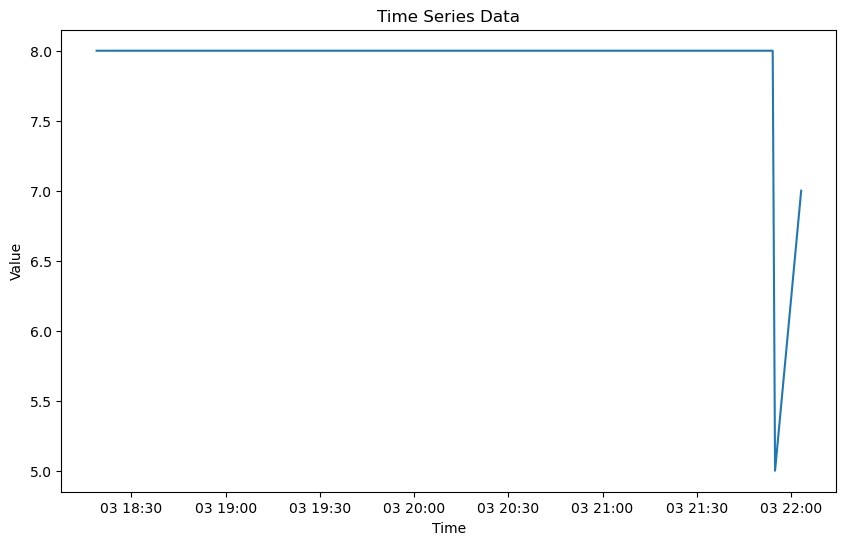

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:37 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:55:51  6.942114    5.248304    8.524324
1  2012-04-03 18:57:40  6.938188    5.297182    8.544909
2  2012-04-03 21:46:15  6.573869    5.069590    8.155998
3  2012-04-03 22:00:42  6.542641    4.951605    8.182404
4  2012-04-03 22:10:42  6.521031    5.025117    8.214734
5  2012-04-03 22:20:42  6.499420    4.861954    8.157384
6  2012-04-03 22:30:42  6.477809    4.781841    8.223383
7  2012-04-03 22:40:42  6.456199    4.898478    7.981489
8  2012-04-03 22:50:42  6.434588    4.812253    7.966054
9  2012-04-03 23:00:42  6.412978    4.729224    8.082087
10 2012-04-03 23:10:42  6.391367    4.668575    8.087513
11 2012-04-03 23:20:42  6.369756    4.757000    8.067672
12 2012-04-03 23:30:42  6.348146    4.740526    8.033816
13 2012-04-03 23:40:42  6.326535    4.777464    7.946268


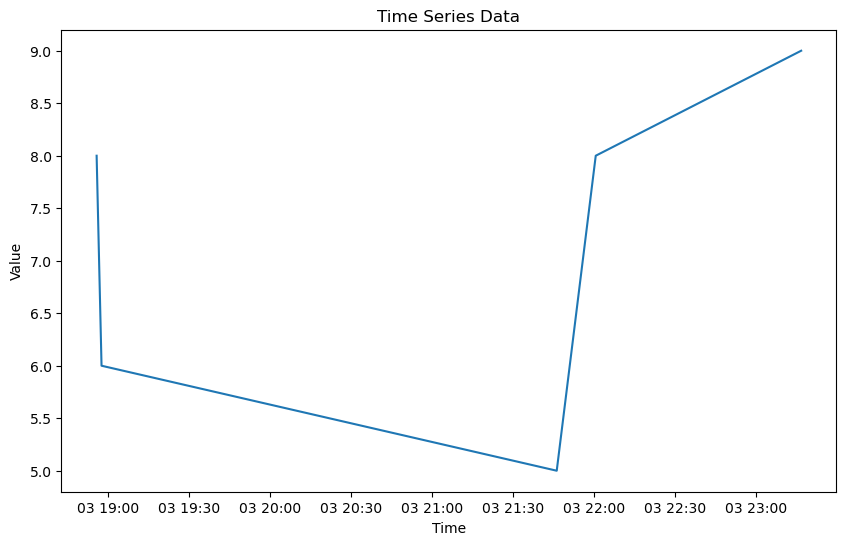

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_12641/2084906445.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()
12:22:37 - cmdstanpy - INFO - Chain [1] start processing
12

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 20:55:33   5.401975    5.007665    5.812574
1  2012-04-03 20:56:14   5.521073    5.087761    5.926524
2  2012-04-03 20:58:50   5.974229    5.568829    6.346179
3  2012-04-03 20:59:34   6.102042    5.715234    6.530075
4  2012-04-03 21:09:34   7.844948    7.419507    8.259023
5  2012-04-03 21:19:34   9.587854    9.189835   10.029780
6  2012-04-03 21:29:34  11.330760   10.912417   11.728746
7  2012-04-03 21:39:34  13.073666   12.663330   13.477211
8  2012-04-03 21:49:34  14.816572   14.393862   15.229907
9  2012-04-03 21:59:34  16.559478   16.149374   16.956429
10 2012-04-03 22:09:34  18.302384   17.932565   18.710504
11 2012-04-03 22:19:34  20.045290   19.651913   20.454387
12 2012-04-03 22:29:34  21.788195   21.379815   22.202286
13 2012-04-03 22:39:34  23.531101   23.122223   23.945306


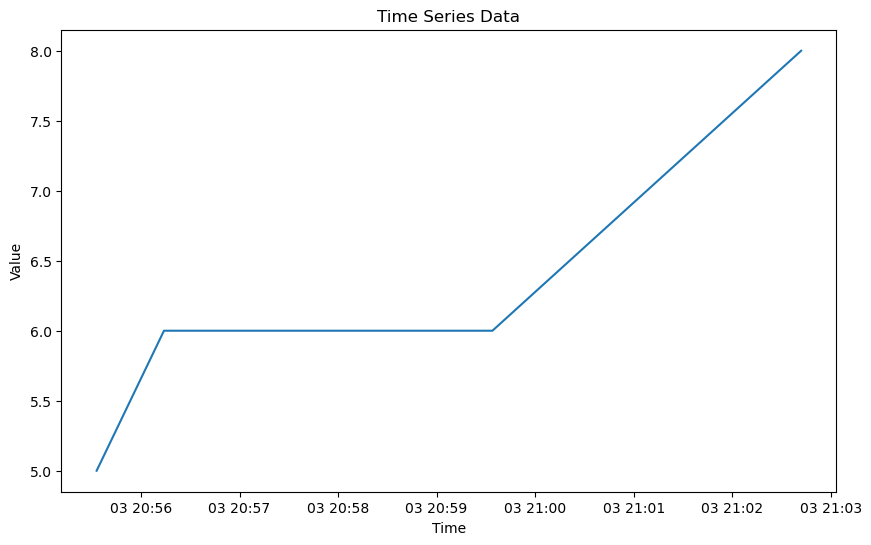

In [28]:
def predict(target_loc):

    filtered_data = df[df['location'] == target_loc]

    filtered_data['end_time'] = pd.to_datetime(filtered_data['end_time'], errors="coerce").dt.tz_localize(None)
    filtered_data["_period"] = filtered_data["end_time"].dt.to_period("D").dt.to_timestamp()

    grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
    
    # Split 80% train, 20% test
    filtered_data = filtered_data.sort_values("end_time")
    train_size = int(len(filtered_data) * 0.8)
    train = filtered_data.iloc[:train_size]
    test = filtered_data.iloc[train_size:]
    model = Prophet()
    # Fit the model
    model.fit(train.rename(columns={"end_time": "ds", "reward": "y"}))

    # Create future dates dataframe 
    future = model.make_future_dataframe(periods=10, freq='10min') 

    # Make predictions 
    forecast = model.predict(future) 
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data["end_time"], filtered_data["reward"])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for loc in target_locs:
    predict(loc)

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:39 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:03:00   6.687065    5.107509    8.143618
1  2012-04-03 18:09:29   6.858106    5.362569    8.397253
2  2012-04-03 18:15:05   7.005843    5.467679    8.575214
3  2012-04-03 18:17:17   7.063882    5.653145    8.584090
4  2012-04-03 18:19:21   7.118404    5.619639    8.637893
5  2012-04-03 18:35:31   7.544906    5.948371    9.068005
6  2012-04-03 18:42:03   7.717266    6.149613    9.191152
7  2012-04-03 18:52:03   7.981082    6.408937    9.469849
8  2012-04-03 19:02:03   8.244897    6.743026    9.714909
9  2012-04-03 19:12:03   8.508713    7.019228   10.072307
10 2012-04-03 19:22:03   8.772529    7.152164   10.225560
11 2012-04-03 19:32:03   9.036345    7.503153   10.522505
12 2012-04-03 19:42:03   9.300161    7.666608   10.787920
13 2012-04-03 19:52:03   9.563976    8.177242   11.158004
14 2012-04-03 20:02:03   9.827792    8.258904   11.215734
15 2012-04-03 20:12:03  10.091608    8.578117   11.609482
16 2012-04-03 

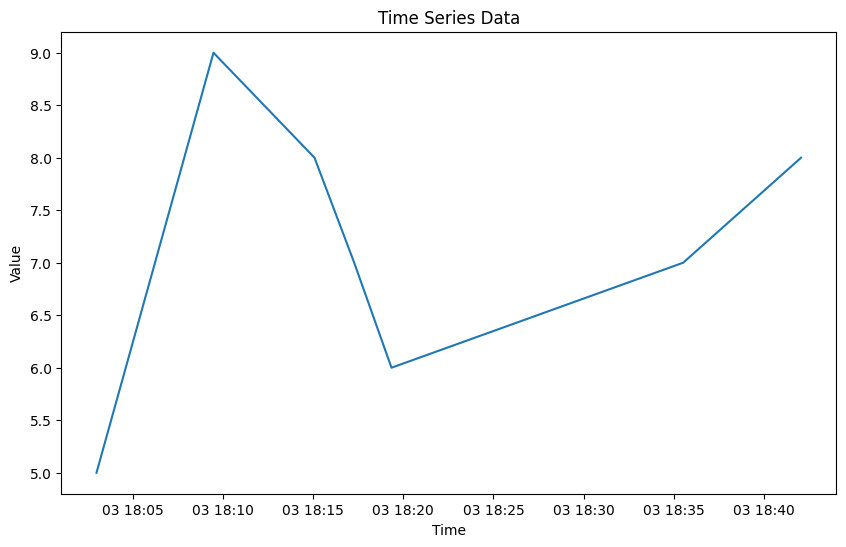

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:15:07  8.261380    6.990166    9.638852
1  2012-04-03 18:15:33  8.244659    6.960999    9.526748
2  2012-04-03 18:24:02  7.917296    6.587638    9.339424
3  2012-04-03 18:36:56  7.419500    6.157293    8.692749
4  2012-04-03 18:37:12  7.409210    6.218241    8.710658
5  2012-04-03 18:46:30  7.050329    5.751021    8.437251
6  2012-04-03 18:56:09  6.677943    5.389429    7.975779
7  2012-04-03 19:06:09  6.292050    4.898254    7.671500
8  2012-04-03 19:16:09  5.906157    4.557130    7.294158
9  2012-04-03 19:26:09  5.520265    4.208095    6.888866
10 2012-04-03 19:36:09  5.134372    3.802947    6.461436
11 2012-04-03 19:46:09  4.748479    3.417777    6.066316
12 2012-04-03 19:56:09  4.362587    3.108729    5.645819
13 2012-04-03 20:06:09  3.976694    2.546420    5.230280
14 2012-04-03 20:16:09  3.590801    2.219047    4.862666
15 2012-04-03 20:26:09  3.204909    1.893837    4.555151
16 2012-04-03 20:36:09  2.81901

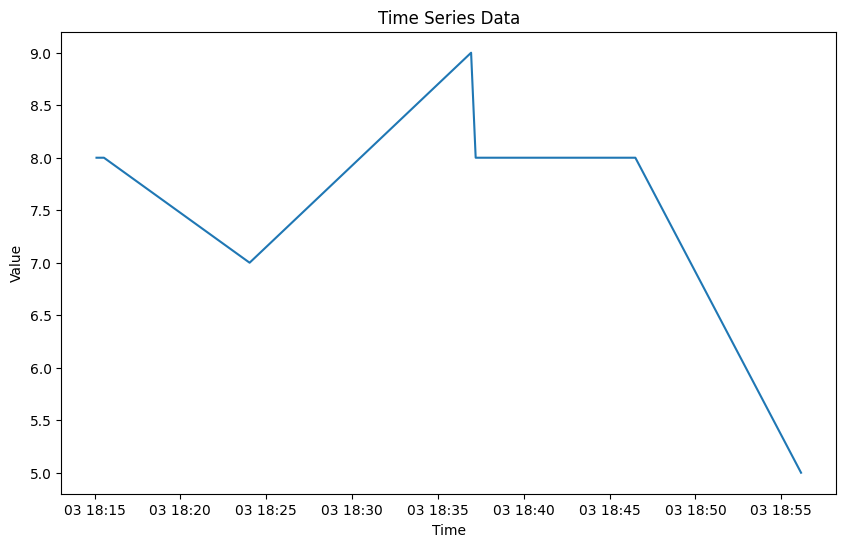

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:02:41   6.893930    5.284404    8.365924
1  2012-04-03 18:07:15   7.050599    5.549186    8.501392
2  2012-04-03 18:08:57   7.108920    5.626710    8.679891
3  2012-04-03 18:12:27   7.228995    5.675487    8.846835
4  2012-04-03 18:39:34   8.159286    6.608928    9.692957
5  2012-04-03 18:51:03   8.553245    7.009759   10.076824
6  2012-04-03 19:01:03   8.896315    7.250035   10.533586
7  2012-04-03 19:11:03   9.239384    7.609338   10.804058
8  2012-04-03 19:21:03   9.582454    8.031883   11.246828
9  2012-04-03 19:31:03   9.925524    8.229232   11.464413
10 2012-04-03 19:41:03  10.268594    8.715716   11.840978
11 2012-04-03 19:51:03  10.611664    9.107518   12.154916
12 2012-04-03 20:01:03  10.954734    9.417940   12.541583
13 2012-04-03 20:11:03  11.297804    9.762214   12.873910
14 2012-04-03 20:21:03  11.640874   10.037621   13.170214
15 2012-04-03 20:31:03  11.983944   10.469227   13.420392


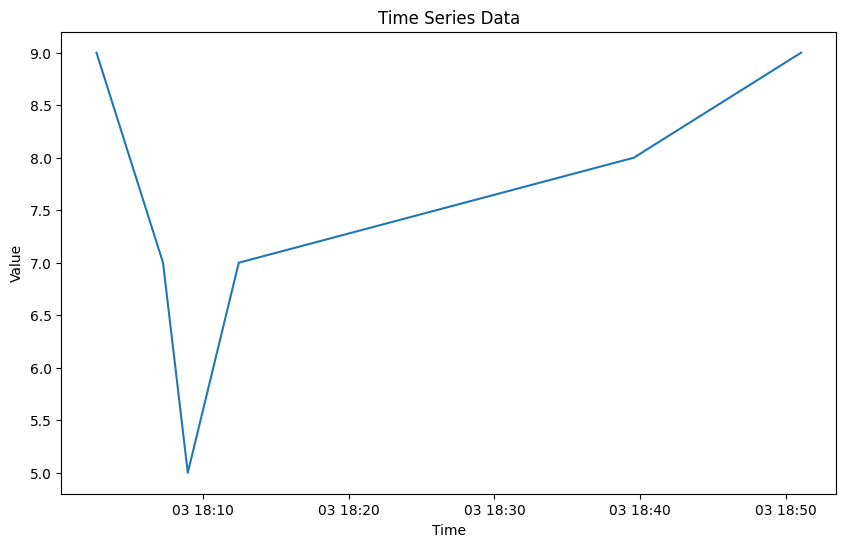

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:38  7.870510    6.265610    9.325849
1  2012-04-03 18:11:04  7.557143    6.114741    9.018317
2  2012-04-03 18:14:21  7.397212    5.881444    8.793951
3  2012-04-03 18:39:42  6.162415    4.743536    7.653431
4  2012-04-03 18:49:42  5.675316    4.257632    7.103362
5  2012-04-03 18:59:42  5.188216    3.696430    6.681762
6  2012-04-03 19:09:42  4.701117    3.269957    6.158379
7  2012-04-03 19:19:42  4.214018    2.758214    5.651284
8  2012-04-03 19:29:42  3.726918    2.271064    5.123322
9  2012-04-03 19:39:42  3.239819    1.770200    4.758467
10 2012-04-03 19:49:42  2.752720    1.383321    4.177905
11 2012-04-03 19:59:42  2.265620    0.870225    3.762085
12 2012-04-03 20:09:42  1.778521    0.406071    3.148043
13 2012-04-03 20:19:42  1.291422   -0.136195    2.765350


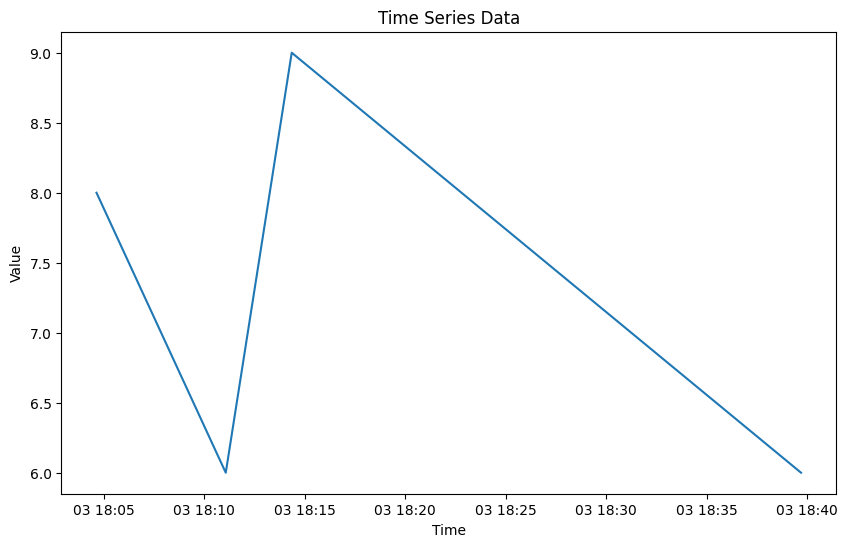

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:13:12  6.786855    5.328753    8.311847
1  2012-04-03 18:27:43  7.087724    5.434885    8.701893
2  2012-04-03 18:42:25  7.392393    5.861308    8.986325
3  2012-04-03 18:57:46  7.710534    6.061675    9.149473
4  2012-04-03 19:07:46  7.917792    6.318089    9.437299
5  2012-04-03 19:17:46  8.125049    6.473413    9.740786
6  2012-04-03 19:27:46  8.332307    6.773688    9.991943
7  2012-04-03 19:37:46  8.539565    6.955832   10.124608
8  2012-04-03 19:47:46  8.746823    7.196842   10.214605
9  2012-04-03 19:57:46  8.954081    7.363804   10.508926
10 2012-04-03 20:07:46  9.161339    7.463016   10.769060
11 2012-04-03 20:17:46  9.368597    7.778588   10.922389
12 2012-04-03 20:27:46  9.575854    7.911242   11.196626
13 2012-04-03 20:37:46  9.783112    8.241911   11.359854


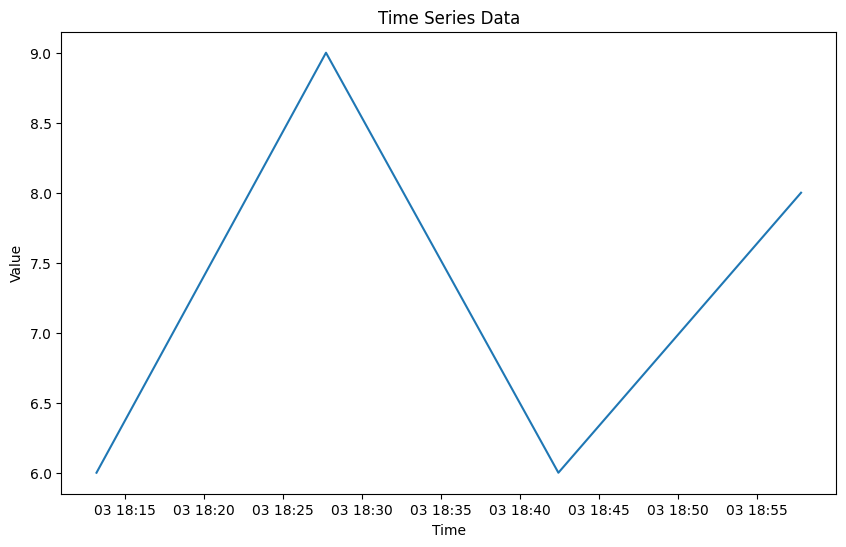

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:04:42   7.200350    6.552922    7.875871
1  2012-04-03 18:19:28   8.110440    7.485667    8.782713
2  2012-04-03 18:21:33   8.238839    7.575648    8.891244
3  2012-04-03 18:24:58   8.449413    7.750516    9.107828
4  2012-04-03 18:34:58   9.065726    8.421504    9.784828
5  2012-04-03 18:44:58   9.682040    9.047171   10.351794
6  2012-04-03 18:54:58  10.298354    9.629640   10.984230
7  2012-04-03 19:04:58  10.914668   10.268629   11.543646
8  2012-04-03 19:14:58  11.530981   10.885107   12.212114
9  2012-04-03 19:24:58  12.147295   11.490236   12.752996
10 2012-04-03 19:34:58  12.763609   12.078026   13.389312
11 2012-04-03 19:44:58  13.379923   12.761945   14.080793
12 2012-04-03 19:54:58  13.996237   13.331204   14.740251
13 2012-04-03 20:04:58  14.612550   13.915947   15.277631


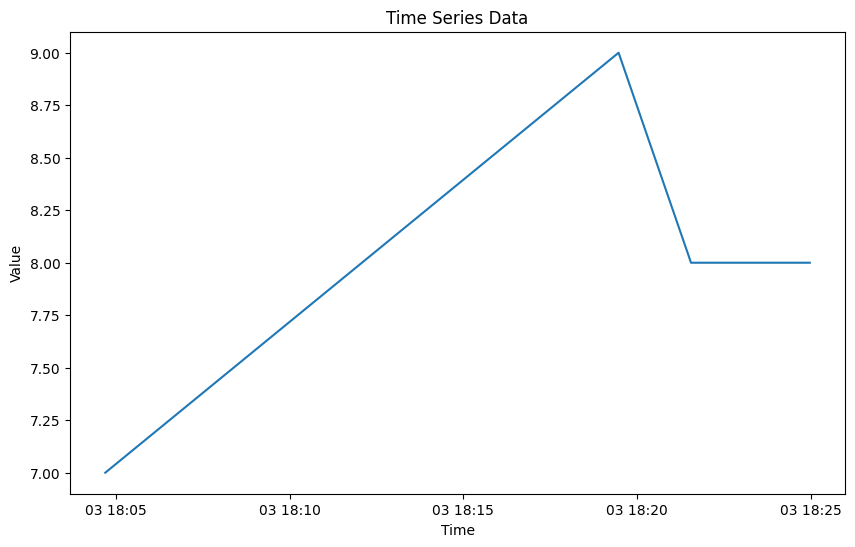

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:40 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:06:18   7.000000    7.000000    7.000000
1  2012-04-03 18:06:19   7.000000    7.000000    7.000000
2  2012-04-03 18:34:55   8.000000    8.000000    8.000000
3  2012-04-03 18:44:55   8.349650    8.271756    8.462486
4  2012-04-03 18:54:55   8.699301    8.317986    9.123747
5  2012-04-03 19:04:55   9.048951    8.310482    9.840352
6  2012-04-03 19:14:55   9.398601    8.202007   10.735212
7  2012-04-03 19:24:55   9.748252    7.977442   11.669271
8  2012-04-03 19:34:55  10.097902    7.567430   12.781514
9  2012-04-03 19:44:55  10.447552    7.273262   13.930901
10 2012-04-03 19:54:55  10.797203    6.788720   15.149692
11 2012-04-03 20:04:55  11.146853    6.147462   16.388720
12 2012-04-03 20:14:55  11.496503    5.499489   17.477074


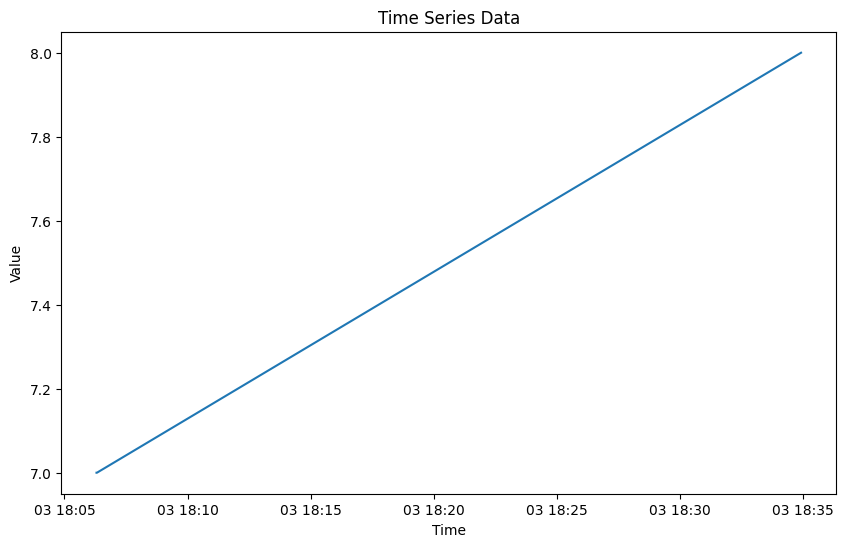

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:42 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:19:25  7.297838    6.553111    8.137682
1  2012-04-03 18:34:10  6.169930    5.404911    6.929138
2  2012-04-03 18:42:32  5.530145    4.758086    6.283569
3  2012-04-03 18:52:32  4.765461    4.060122    5.543689
4  2012-04-03 19:02:32  4.000778    3.228278    4.729405
5  2012-04-03 19:12:32  3.236094    2.496591    4.010461
6  2012-04-03 19:22:32  2.471411    1.691345    3.221773
7  2012-04-03 19:32:32  1.706727    0.936114    2.506665
8  2012-04-03 19:42:32  0.942044    0.205127    1.818260
9  2012-04-03 19:52:32  0.177360   -0.610142    0.954593
10 2012-04-03 20:02:32 -0.587323   -1.365406    0.143010
11 2012-04-03 20:12:32 -1.352007   -2.100095   -0.601633
12 2012-04-03 20:22:32 -2.116690   -2.886662   -1.374003


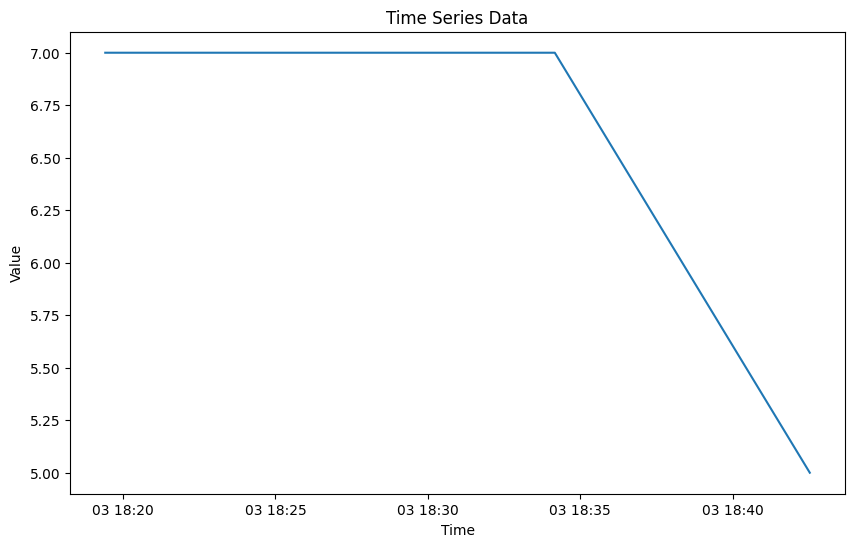

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:43 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:00:09   9.000000    9.000000    9.000000
1  2012-04-03 18:02:24   8.000000    8.000000    8.000000
2  2012-04-03 18:09:06   6.000000    6.000000    6.000000
3  2012-04-03 18:19:06   3.014925    1.761427    4.257593
4  2012-04-03 18:29:06   0.029851   -3.904921    4.032675
5  2012-04-03 18:39:06  -2.955224  -10.505630    4.405283
6  2012-04-03 18:49:06  -5.940299  -17.889863    5.562405
7  2012-04-03 18:59:06  -8.925373  -25.841555    8.034884
8  2012-04-03 19:09:06 -11.910448  -34.580171   10.002079
9  2012-04-03 19:19:06 -14.895523  -43.360831   12.671531
10 2012-04-03 19:29:06 -17.880597  -51.746323   16.696730
11 2012-04-03 19:39:06 -20.865672  -61.942507   20.869053
12 2012-04-03 19:49:06 -23.850746  -72.646126   26.418802


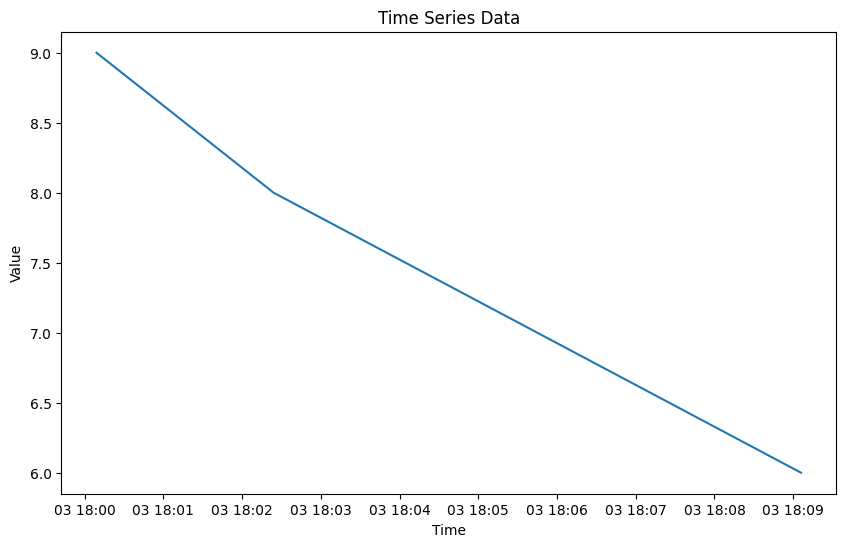

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:44 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:31:32   7.677347    7.274062    8.119743
1  2012-04-03 18:32:11   7.447765    7.023796    7.860463
2  2012-04-03 18:33:49   6.870867    6.427331    7.289333
3  2012-04-03 18:43:49   3.338837    2.914216    3.741838
4  2012-04-03 18:53:49  -0.193193   -0.623715    0.216551
5  2012-04-03 19:03:49  -3.725224   -4.131616   -3.308059
6  2012-04-03 19:13:49  -7.257254   -7.678738   -6.851514
7  2012-04-03 19:23:49 -10.789284  -11.212157  -10.352366
8  2012-04-03 19:33:49 -14.321314  -14.756137  -13.896623
9  2012-04-03 19:43:49 -17.853345  -18.257241  -17.468672
10 2012-04-03 19:53:49 -21.385375  -21.810314  -20.938061
11 2012-04-03 20:03:49 -24.917405  -25.348868  -24.512707
12 2012-04-03 20:13:49 -28.449435  -28.826450  -28.022018


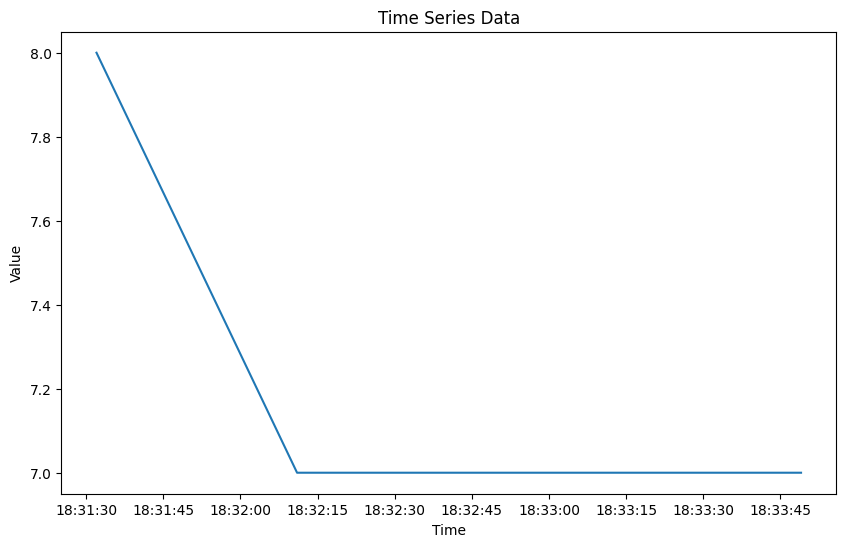

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:44 - cmdstanpy - INFO - Chain [1] start proc

                    ds       yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:39   6.364567    5.691811    7.078077
1  2012-04-03 18:16:10   6.745721    6.044220    7.526469
2  2012-04-03 18:47:11   8.888708    8.139445    9.608887
3  2012-04-03 18:57:11   9.579623    8.844959   10.341315
4  2012-04-03 19:07:11  10.270538    9.510313   11.003789
5  2012-04-03 19:17:11  10.961452   10.230162   11.700570
6  2012-04-03 19:27:11  11.652367   10.954214   12.397348
7  2012-04-03 19:37:11  12.343282   11.542363   13.049997
8  2012-04-03 19:47:11  13.034196   12.256152   13.767304
9  2012-04-03 19:57:11  13.725111   13.010027   14.463427
10 2012-04-03 20:07:11  14.416026   13.698883   15.152461
11 2012-04-03 20:17:11  15.106940   14.364107   15.807855
12 2012-04-03 20:27:11  15.797855   15.080350   16.477469


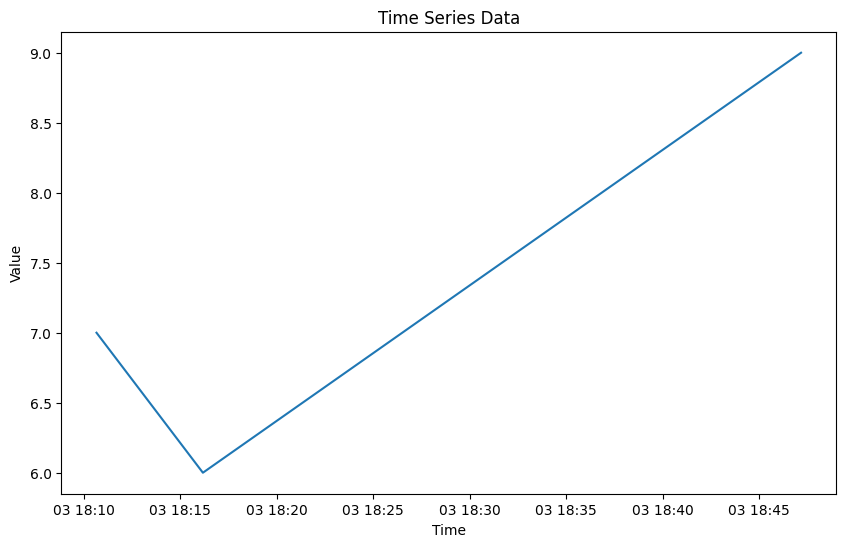

/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
/var/folders/q7/chgf4z450lb6h0mz788wtj180000gn/T/ipykernel_25444/4075587858.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
14:57:45 - cmdstanpy - INFO - Chain [1] start proc

                    ds      yhat  yhat_lower  yhat_upper
0  2012-04-03 18:10:04  7.026508    5.880769    8.140859
1  2012-04-03 18:16:19  7.150668    6.023817    8.121103
2  2012-04-03 18:49:59  7.819480    6.750006    8.900401
3  2012-04-03 18:59:59  8.018136    6.951919    9.093861
4  2012-04-03 19:09:59  8.216793    7.109981    9.303630
5  2012-04-03 19:19:59  8.415450    7.302685    9.579872
6  2012-04-03 19:29:59  8.614107    7.529550    9.732499
7  2012-04-03 19:39:59  8.812764    7.698434    9.915211
8  2012-04-03 19:49:59  9.011421    7.936982   10.095095
9  2012-04-03 19:59:59  9.210078    8.094091   10.283381
10 2012-04-03 20:09:59  9.408734    8.250960   10.489937
11 2012-04-03 20:19:59  9.607391    8.458555   10.723318
12 2012-04-03 20:29:59  9.806048    8.688935   10.878175


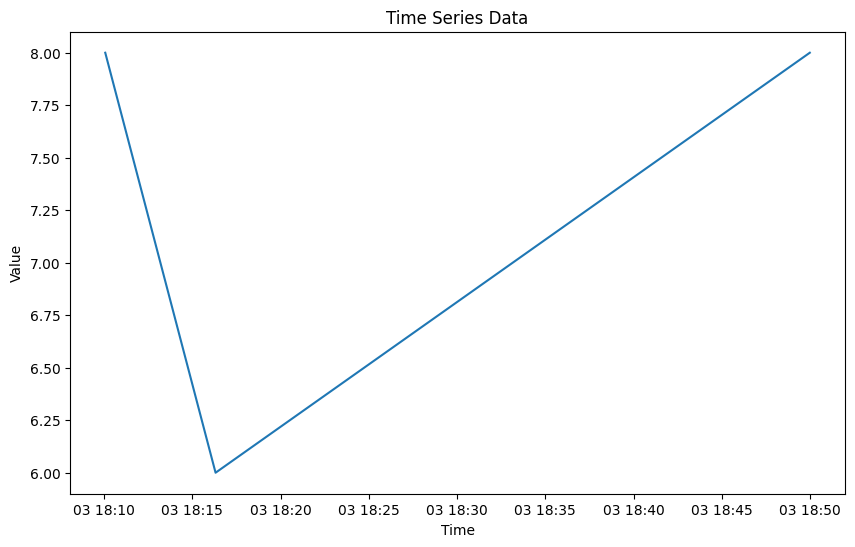

In [ ]:
def predict(target_loc):

    filtered_data = df[df['location'] == target_loc]

    

    filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
    filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
    grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
    model = Prophet()

    # Fit the model
    model.fit(filtered_data.rename(columns={"appear_time": "ds", "reward": "y"}))

    # Create future dates dataframe 
    future = model.make_future_dataframe(periods=10, freq='10min') 

    # Make predictions 
    forecast = model.predict(future) 
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data["appear_time"], filtered_data["reward"])
    plt.title('Time Series Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

for loc in target_locs:
    predict(loc)

In [ ]:
target_loc = 43

filtered_data = df[df[loc] == target_loc]

print(filtered_data)
print(type(filtered_data))

filtered_data['appear_time'] = pd.to_datetime(filtered_data['appear_time'], errors="coerce").dt.tz_localize(None)
filtered_data["_period"] = filtered_data["appear_time"].dt.to_period("D").dt.to_timestamp()
grouped = filtered_data.groupby(["_period"]).size().rename("count").reset_index()
model = Prophet()

# Fit the model
model.fit(filtered_data.rename(columns={"appear_time": "ds", "reward": "y"}))

# Create future dates dataframe 
future = model.make_future_dataframe(periods=10, freq='10min') 

# Make predictions 
forecast = model.predict(future) 
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
plt.figure(figsize=(10, 6))
plt.plot(filtered_data["appear_time"], filtered_data["reward"])
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
import sys
!{sys.executable} -m pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 7.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 8.1 MB/s eta 0:00:00a 0:00:01
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File

In [ ]:
# Filter data for a specific location
# Using one of the locations with high check-in counts from the duplicates DataFrame
target_lat = 40.750795
target_lon = -73.993576

# Allow for some small variation in coordinates (within ~10 meters)
tolerance = 0.0001

# Filter the data
filtered_data = df[
    (df[lat_col].between(target_lat - tolerance, target_lat + tolerance)) & 
    (df[lon_col].between(target_lon - tolerance, target_lon + tolerance))
]

# Save to new CSV file
filtered_data.to_csv('filtered_location_data.csv', index=False)

print(f"Found {len(filtered_data)} records for location (lat={target_lat}, lon={target_lon})")
print(f"Data saved to filtered_location_data.csv")

Found 1156 records for location (lat=40.750795, lon=-73.993576)
Data saved to filtered_location_data.csv


c:\Users\cbassem\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\cbassem\AppData\Local\Temp\ipykernel_22072\3802657395.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")
C:\Users\cbassem\AppData\Local\Temp\ipykernel_22072\3802657395.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
17:21:03 - cmdstanpy - INFO - Chain [1] start processing
17:21:04 - cmdstanpy - INFO - Chain [1] done processing


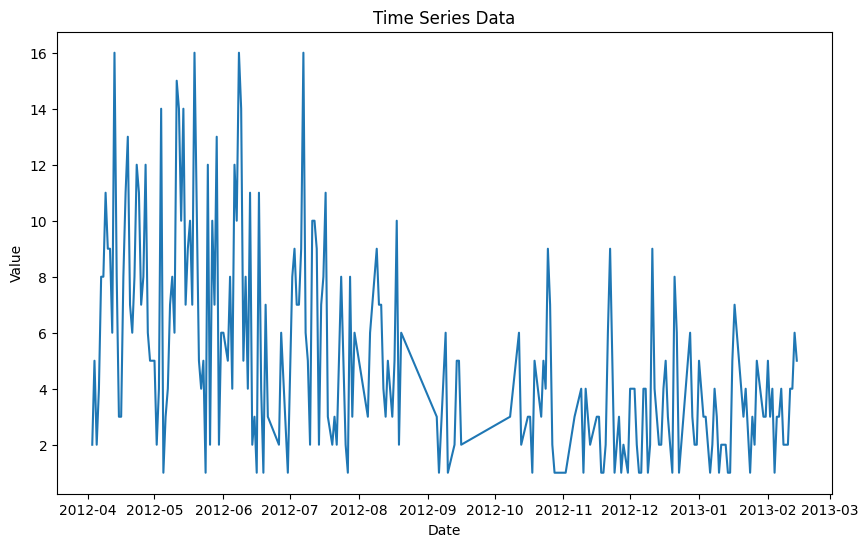

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# data = pd.read_csv('filtered_location_data.csv')
# ts_col = data.columns[7]
# data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")

# data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
# grouped = data.groupby(["_period"]).size().rename("count").reset_index()

# Initialize the model
model = Prophet()

# Fit the model
# model.fit(grouped.rename(columns={"_period": "ds", "count": "y"}))

# Create future dates dataframe 
future = model.make_future_dataframe(periods=20) # 90 days into the future, depends on your choice

# Make predictions 
forecast = model.predict(future) 

# View the forecast 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

plt.figure(figsize=(10, 6))
plt.plot(grouped["_period"], grouped["count"])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

C:\Users\cbassem\AppData\Local\Temp\ipykernel_17732\2593786689.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")
C:\Users\cbassem\AppData\Local\Temp\ipykernel_17732\2593786689.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()


Root Mean Squared Error: 2.482001268243581


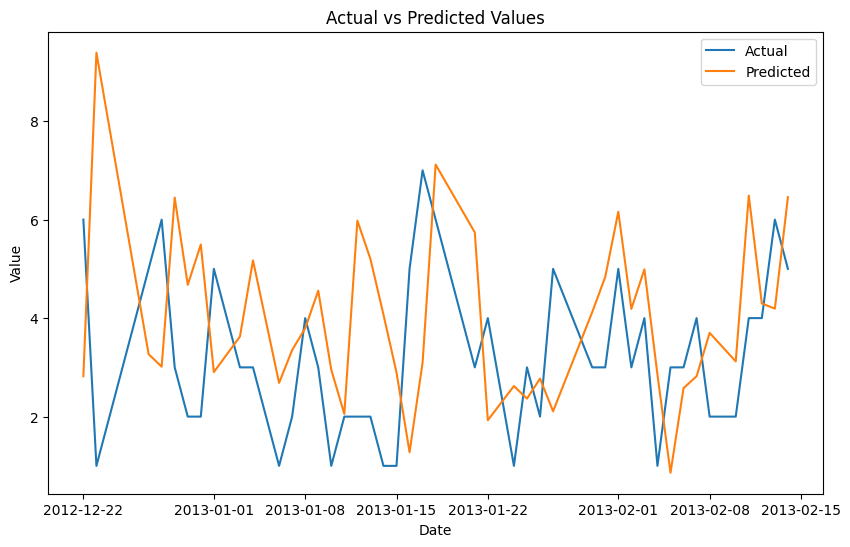

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv('filtered_location_data.csv')
data = pd.read_csv('filtered_location_data.csv')
ts_col = data.columns[7]
data[ts_col] = pd.to_datetime(data[ts_col], errors="coerce")

data["_period"] = data[ts_col].dt.to_period("D").dt.to_timestamp()
grouped = data.groupby(["_period"]).size().rename("count").reset_index()
grouped.set_index('_period', inplace=True)

# Create lag features
def create_lag_features(df, lags, target_col):
  for lag in range(1, lags + 1):
    df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
  df.dropna(inplace=True)
  return df

grouped = create_lag_features(grouped, lags=10, target_col='count')
# Split data into features and target
X = grouped.drop(columns=['count'])
y = grouped['count']

# Split data into train and test sets
train_size = int(len(grouped) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# print (X_train)# Initialize the model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()